<a href="https://colab.research.google.com/github/angyf/proyecto/blob/main/Proyecto_M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de datos

##A continuación, analizaremos una base de datos sobre pacientes adultos con y sin una enfermedad cardiovascular (ECV). La ECV podría desarrollarse dependiendo de sus niveles de colesterol, glucosa, su presión sanguínea, si fuma o no, si es alcohólica, su grado de imc y si realiza actividad física o no.
##Es importante conocer este tipo de población puesto que las enfermedades cardiovasculares son la primer causa de muerte en adultos a nivel mundial y en México, por lo que conocer los principales factores asociados al desarrollo de la enfermedad es clave para el diagnóstico temprano en los pacientes. 

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import skew,kurtosis
from sklearn.model_selection import cross_validate
from sklearn import metrics
import numpy as np

In [2]:
datos_adultos=pd.read_csv('https://raw.githubusercontent.com/angyf/proyecto/main/datos_adultos_total.csv',index_col=0)

In [3]:
datos_adultos=datos_adultos.reset_index(drop=True)

# Postwork 1

Estimados de locación y variabilidad de columnas númericas


Fue importante primero determina los valores de locación y variabilidad de cada una de nuestras variables numéricas para poder identificar datos atípicos en nuestro data set.

Con respecto a la variable peso notamos que el promedio y la mediana se aproximan, sin embargo tenemos una desviación de 14.4 lo cual nos indica algo de dispersión en nuestros datos, además el rango es un valor muy grande por lo que tenemos algunos datos atipicos en nuestro dataset.

In [4]:
#Medidas de la variable peso
print(f"Promedio:{round(datos_adultos['peso'].mean(),2)}")
print(f"Mediana: {round(datos_adultos['peso'].median())}")
print(f"Media truncada: {round(stats.trim_mean(datos_adultos['peso'], 0.2),2)}")
print(f"Desviación estandar: {round(datos_adultos['peso'].std(),2)}")
print(f"Rango: {round(datos_adultos['peso'].max()-datos_adultos['peso'].min(),2)}")
print(f"Percentil 25: {round(datos_adultos['peso'].quantile(.25),2)}")
print(f"Percentil 75: {round(datos_adultos['peso'].quantile(.75),2)}")
print(f"Rango intercuartil: {round(datos_adultos['peso'].quantile(.75)-datos_adultos['peso'].quantile(.25),2)}")

Promedio:74.2
Mediana: 72
Media truncada: 72.64
Desviación estandar: 14.4
Rango: 190
Percentil 25: 65.0
Percentil 75: 82.0
Rango intercuartil: 17.0


Con respecto a la edad observamos que nuestros datos no se encuentran tan dispersos y el rango es considerablemente pequeño por lo que podriamos suponer que no hay tantos datos atipicos.

In [5]:
#Medidas de la variable edad
print(f"Promedio:{round(datos_adultos['edad'].mean(),2)}")
print(f"Mediana: {round(datos_adultos['edad'].median())}")
print(f"Media truncada: {round(stats.trim_mean(datos_adultos['edad'], 0.2),2)}")
print(f"Desviación estandar: {round(datos_adultos['edad'].std(),2)}")
print(f"Rango: {round(datos_adultos['edad'].max()-datos_adultos['edad'].min(),2)}")
print(f"Percentil 25: {round(datos_adultos['edad'].quantile(.25),2)}")
print(f"Percentil 75: {round(datos_adultos['edad'].quantile(.75),2)}")
print(f"Rango intercuartil: {round(datos_adultos['edad'].quantile(.75)-datos_adultos['edad'].quantile(.25),2)}")


Promedio:52.84
Mediana: 53
Media truncada: 53.34
Desviación estandar: 6.77
Rango: 35
Percentil 25: 48.0
Percentil 75: 58.0
Rango intercuartil: 10.0


A pesar de que la media y la media truncada en la variable altura no cambian mucho, sabemos que hay presencia de datos atipicos pues el rango es un valor muy grande. A pesar de eso, la dispersión de las alturas parece ser poca.

In [6]:
#Medidas de la variable altura
print(f"Promedio:{round(datos_adultos['altura'].mean(),2)}")
print(f"Mediana: {round(datos_adultos['altura'].median())}")
print(f"Media truncada: {round(stats.trim_mean(datos_adultos['altura'], 0.2),2)}")
print(f"Desviación estandar: {round(datos_adultos['altura'].std(),2)}")
print(f"Rango: {round(datos_adultos['altura'].max()-datos_adultos['altura'].min(),2)}")
print(f"Percentil 25: {round(datos_adultos['altura'].quantile(.25),2)}")
print(f"Percentil 75: {round(datos_adultos['altura'].quantile(.75),2)}")
print(f"Rango intercuartil: {round(datos_adultos['altura'].quantile(.75)-datos_adultos['altura'].quantile(.25),2)}")

Promedio:164.36
Mediana: 165
Media truncada: 164.33
Desviación estandar: 8.21
Rango: 195
Percentil 25: 159.0
Percentil 75: 170.0
Rango intercuartil: 11.0


En este caso de la variable presión sistólica observamos que el promedio truncado sí tuvo un cambio considerable, basándonos en ello, en la desviación estandar y en el rango podemos asegurar la presencia de bastantes datos atipicos.

In [7]:
datos_adultos.shape

(70000, 13)

In [8]:
#Medidas de la variable presion sistolica
print(f"Promedio:{round(datos_adultos['presion_sistolica'].mean(),2)}")
print(f"Mediana: {round(datos_adultos['presion_sistolica'].median())}")
print(f"Media truncada: {round(stats.trim_mean(datos_adultos['presion_sistolica'], 0.2),2)}")
print(f"Desviación estandar: {round(datos_adultos['presion_sistolica'].std(),2)}")
print(f"Rango: {round(datos_adultos['presion_sistolica'].max()-datos_adultos['presion_sistolica'].min(),2)}")
print(f"Percentil 25: {round(datos_adultos['presion_sistolica'].quantile(.25),2)}")
print(f"Percentil 75: {round(datos_adultos['presion_sistolica'].quantile(.75),2)}")
print(f"Rango intercuartil: {round(datos_adultos['presion_sistolica'].quantile(.75)-datos_adultos['presion_sistolica'].quantile(.25),2)}")

Promedio:128.82
Mediana: 120
Media truncada: 124.89
Desviación estandar: 154.01
Rango: 16170
Percentil 25: 120.0
Percentil 75: 140.0
Rango intercuartil: 20.0


Al igual que el caso anterior, podemos asegurar que hay bastantes datos atipicos en la presión diastólica pues la media truncada tuvo una reducción algo grande, además los datos se encuentran muy dispersos.

In [9]:
#Medidas de la variable presión diastolica
print(f"Promedio:{round(datos_adultos['presion_diastolica'].mean(),2)}")
print(f"Mediana: {round(datos_adultos['presion_diastolica'].median())}")
print(f"Media truncada: {round(stats.trim_mean(datos_adultos['presion_diastolica'], 0.2),2)}")
print(f"Desviación estandar: {round(datos_adultos['presion_diastolica'].std(),2)}")
print(f"Rango: {round(datos_adultos['presion_diastolica'].max()-datos_adultos['presion_diastolica'].min(),2)}")
print(f"Percentil 25: {round(datos_adultos['presion_diastolica'].quantile(.25),2)}")
print(f"Percentil 75: {round(datos_adultos['presion_diastolica'].quantile(.75),2)}")
print(f"Rango intercuartil: {round(datos_adultos['presion_diastolica'].quantile(.75)-datos_adultos['presion_diastolica'].quantile(.25),2)}")

Promedio:96.63
Mediana: 80
Media truncada: 81.61
Desviación estandar: 188.47
Rango: 11070
Percentil 25: 80.0
Percentil 75: 90.0
Rango intercuartil: 10.0


Esta variable fue creada originalmente para resumir información acerca del índice de masa corporal (imc) de la muestra poblacional analizada, variable importante puesto que se relaciona directamente con la obesidad y el sobrepeso. Algunos de los principales factores de riesgo. 

In [10]:
#Medidas de la variable indice de masa corporal
print(f"Promedio:{round(datos_adultos['imc'].mean(),2)}")
print(f"Mediana: {round(datos_adultos['imc'].median())}")
print(f"Media truncada: {round(stats.trim_mean(datos_adultos['imc'], 0.2),2)}")
print(f"Desviación estandar: {round(datos_adultos['imc'].std(),2)}")
print(f"Rango: {round(datos_adultos['imc'].max()-datos_adultos['imc'].min(),2)}")
print(f"Percentil 25: {round(datos_adultos['imc'].quantile(.25),2)}")
print(f"Percentil 75: {round(datos_adultos['imc'].quantile(.75),2)}")
print(f"Rango intercuartil: {round(datos_adultos['imc'].quantile(.75)-datos_adultos['imc'].quantile(.25),2)}")

Promedio:27.56
Mediana: 26
Media truncada: 26.69
Desviación estandar: 6.09
Rango: 295.2
Percentil 25: 23.88
Percentil 75: 30.22
Rango intercuartil: 6.34


##Con este primer análisis podemos concluir que nuestra base de datos contiene datos atípicos que deberían ser "tratados" con el fin de que nuestros análisis posteriores sean lo menos sesgados posible.

# Postwork 2  

Visualización de datos: Distribuciones

Observamos que la variable edad tiene una buena distribución, pues los datos no se encuentran muy dispersos y tenemos pocos datos atipicos.

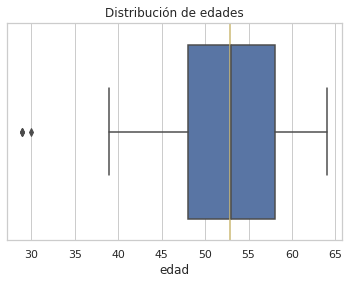

In [11]:
sns.set(style="whitegrid")
sns.boxplot(x=datos_adultos['edad'])
plt.axvline(datos_adultos['edad'].mean(), c='y')
plt.title('Distribución de edades');

Observamos que nuestra variable peso se concentra en valores menores a 100 y que se encuentran poco dispersos, sin embargo hay algunos valores atipicos que crean una cola hacia la derecha y unos cuantos a la izquierda.

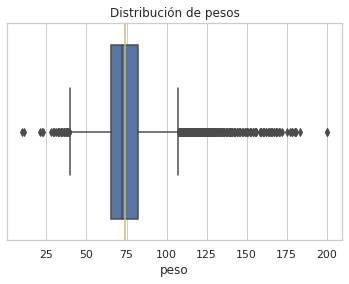

In [12]:
sns.boxplot(x=datos_adultos['peso'])
plt.title('Distribución de pesos')
plt.axvline(datos_adultos['peso'].mean(), c='y');

Contrario a los pesos, la distribución de las alturas tiene una cola a la izquierda  pues la presencia de datos atipicos menores al primer cuartil es mayor, sin embargo, notamos que la dispersión de los datos es pequeña pues 50% de nuestra muestra se encuentra entre 150 y 175 cm.

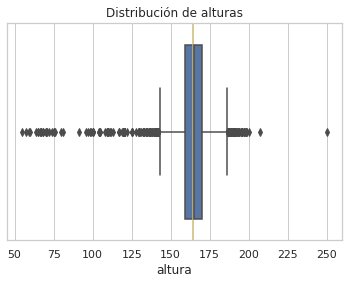

In [13]:
sns.boxplot(x=datos_adultos['altura'])
plt.title('Distribución de alturas')
plt.axvline(datos_adultos['altura'].mean(), c='y');

debido a que la variable IMC fue calculada con peso y altura, esta presenta valores atipicos principalmente a la derecha.

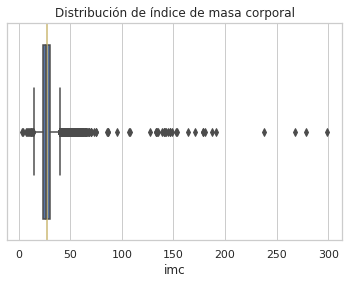

In [14]:
sns.boxplot(x=datos_adultos['imc'])
plt.title('Distribución de índice de masa corporal')
plt.axvline(datos_adultos['imc'].mean(), c='y');

En este caso, notamos la presencia de datos atipicos muy grandes, que hacen que nuestro gráfico se haga muy pequeño, esto seguramente se debe a errores de registro por lo que lo mejor será deshacernos de ellos más adelante.

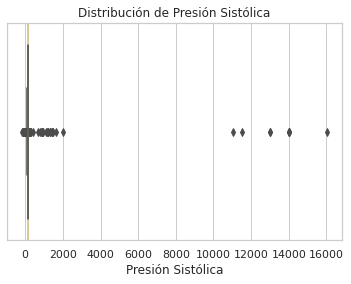

In [15]:
sns.boxplot(x=datos_adultos['presion_sistolica'])
plt.title('Distribución de Presión Sistólica')
plt.xlabel('Presión Sistólica')
plt.axvline(datos_adultos['presion_sistolica'].mean(), c='y');

Al igual que la presión sistólica, en esta variable tenemos datos atípicos muy grandes que seguramente se debieron a algún error en el registro de la información por lo que lo mejor será eliminarlos.

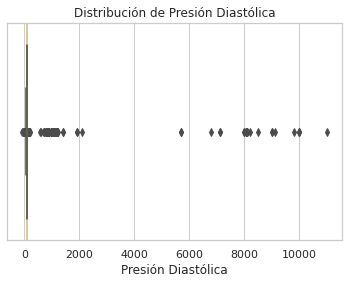

In [16]:
sns.boxplot(x=datos_adultos['presion_diastolica'])
plt.title('Distribución de Presión Diastólica')
plt.xlabel('Presión Diastólica')
plt.axvline(datos_adultos['presion_diastolica'].mean(), c='y');

Notamos que en las variables de presión diastólica y sistólica es donde la presencia de los datos atipicos afecta más la distribución de nuestos datos,asi mismo, el resto de nuestras variables numéricas (excepto edad) presentan valores atipicos por lo que se realizará el filtro sobre ellos para ver cuánto cambian nuestros estimados de locación.

## Datos Filtrados

In [17]:
#Creamos los filtros para eliminar los valores atipicos en el dataset original, sin embargo
#con ayuda de los filtros inferior y superior se aplicaran al nuevo data set con el fin de 
#calcularlos con los datos iniciales.

iqr = datos_adultos['peso'].quantile(0.75) - datos_adultos['peso'].quantile(0.25)
filtro_inferior = datos_adultos['peso'] > datos_adultos['peso'].quantile(0.25) - (iqr * 1.5)
filtro_superior = datos_adultos['peso'] < datos_adultos['peso'].quantile(0.75) + (iqr * 1.5)

datos_adultos_filtrado = datos_adultos[filtro_inferior & filtro_superior]

iqr = datos_adultos['imc'].quantile(0.75) - datos_adultos['imc'].quantile(0.25)
filtro_inferior = datos_adultos_filtrado['imc'] > datos_adultos['imc'].quantile(0.25) - (iqr * 1.5)
filtro_superior = datos_adultos_filtrado['imc'] < datos_adultos['imc'].quantile(0.75) + (iqr * 1.5)

datos_adultos_filtrado = datos_adultos_filtrado[filtro_inferior & filtro_superior]

iqr = datos_adultos['altura'].quantile(0.75) - datos_adultos['altura'].quantile(0.25)
filtro_inferior = datos_adultos_filtrado['altura'] > datos_adultos['altura'].quantile(0.25) - (iqr * 1.5)
filtro_superior = datos_adultos_filtrado['altura'] < datos_adultos['altura'].quantile(0.75) + (iqr * 1.5)

datos_adultos_filtrado = datos_adultos_filtrado[filtro_inferior & filtro_superior]

iqr = datos_adultos['presion_sistolica'].quantile(0.75) - datos_adultos['presion_sistolica'].quantile(0.25)
filtro_inferior = datos_adultos_filtrado['presion_sistolica'] > datos_adultos['presion_sistolica'].quantile(0.25) - (iqr * 1.5)
filtro_superior = datos_adultos_filtrado['presion_sistolica'] < datos_adultos['presion_sistolica'].quantile(0.75) + (iqr * 1.5)

datos_adultos_filtrado = datos_adultos_filtrado[filtro_inferior & filtro_superior]

iqr = datos_adultos['presion_diastolica'].quantile(0.75) - datos_adultos['presion_diastolica'].quantile(0.25)
filtro_inferior = datos_adultos_filtrado['presion_diastolica'] > datos_adultos['presion_diastolica'].quantile(0.25) - (iqr * 1.5)
filtro_superior = datos_adultos_filtrado['presion_diastolica'] < datos_adultos['presion_diastolica'].quantile(0.75) + (iqr * 1.5)

datos_adultos_filtrado = datos_adultos_filtrado[filtro_inferior & filtro_superior]

iqr = datos_adultos['edad'].quantile(0.75) - datos_adultos['edad'].quantile(0.25)
filtro_inferior = datos_adultos_filtrado['edad'] > datos_adultos['edad'].quantile(0.25) - (iqr * 1.5)
filtro_superior = datos_adultos_filtrado['edad'] < datos_adultos['edad'].quantile(0.75) + (iqr * 1.5)

datos_adultos_filtrado = datos_adultos_filtrado[filtro_inferior & filtro_superior]

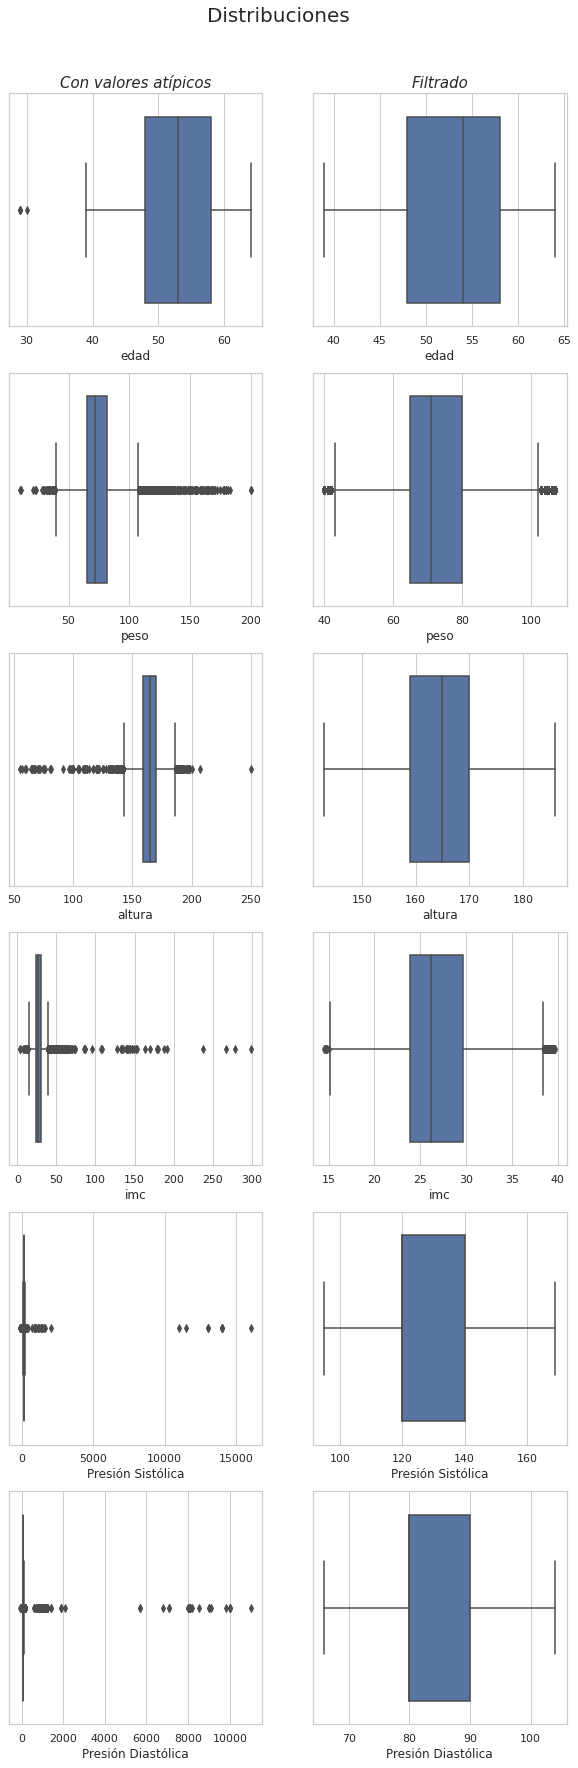

In [18]:
# Creamos una imagen que contenga los boxplot para comparar las distribuciones originales
#contra las distribuciones de los datos filtrados.
fig,axes=plt.subplots(6,2,figsize=(10,30))
fig.suptitle('Distribuciones',fontsize=20,y=0.92)

#creamos los boxplot con los datos originales y con los datos filtrados
sns.boxplot(x=datos_adultos['edad'],ax=axes[0,0],color='b',orient='h')
sns.boxplot(x=datos_adultos['peso'],ax=axes[1,0],color='b',orient='h')
sns.boxplot(x=datos_adultos['altura'],ax=axes[2,0],color='b',orient='h')
sns.boxplot(x=datos_adultos['imc'],ax=axes[3,0],color='b',orient='h')
sns.boxplot(x=datos_adultos['presion_sistolica'],ax=axes[4,0],color='b')
sns.boxplot(x=datos_adultos['presion_diastolica'],ax=axes[5,0],color='b')
sns.boxplot(x=datos_adultos_filtrado['edad'],ax=axes[0,1],color='b')
sns.boxplot(x=datos_adultos_filtrado['peso'],ax=axes[1,1],color='b')
sns.boxplot(x=datos_adultos_filtrado['altura'],ax=axes[2,1],color='b')
sns.boxplot(x=datos_adultos_filtrado['imc'],ax=axes[3,1],color='b')
sns.boxplot(x=datos_adultos_filtrado['presion_sistolica'],ax=axes[4,1],color='b')

#agregamos algunos titulos y nombres a los ejes
axes[0,0].set_title('Con valores atípicos',fontsize=15,style='italic')
axes[0,1].set_title('Filtrado',fontsize=15,style='italic')
axes[5,0].set(xlabel='Presión Diastólica')
axes[4,0].set(xlabel='Presión Sistólica') 
axes[4,1].set(xlabel='Presión Sistólica')
sns.boxplot(x=datos_adultos_filtrado['presion_diastolica'],ax=axes[5,1],color='b')
axes[5,1].set(xlabel='Presión Diastólica');

Con los gráficos anteriores podemos observar de mejor manera las distribuciones de nuestras variables.

Ahora compararemos las medidas de locación para saber qué tanto fueron afectadas al momento de eliminar los valores atipicos de nuestro dataset original.
Aunque se espera que la mayor diferencia se note en las presiones pues estas presentaban datos atipicos muy grandes.

En la variable peso lo que más varió fue la desviación estándar pues esta resultaba ser la mas afectada por los datos atipicos, sin embargo el resto de las medidas no cambiaron mucho.

In [19]:
print(f'Medidas de peso \n')
print(f'{("Medida"):20}| {("Originales") }|{("Sin datos atipicos"):2}')
print(f'---------------------------------------------------')
print(f"{'Promedio':20}| {round(datos_adultos['peso'].mean(),2):10}|{round(datos_adultos_filtrado['peso'].mean(),2):17}")
print(f"{'Media truncada':20}| {round(stats.trim_mean(datos_adultos['peso'], 0.2),2):10}|{round(stats.trim_mean(datos_adultos_filtrado['peso'],0.2),2):17}")
print(f"{'Mediana':20}| {round(datos_adultos['peso'].median(),2):10}|{round(datos_adultos_filtrado['peso'].median(),2):17}")
print(f"Desviación estandar | {round(datos_adultos['peso'].std(),2):10}|{round(datos_adultos_filtrado['peso'].std(),2):17}")


Medidas de peso 

Medida              | Originales|Sin datos atipicos
---------------------------------------------------
Promedio            |       74.2|            72.86
Media truncada      |      72.64|             72.0
Mediana             |       72.0|             71.0
Desviación estandar |       14.4|            11.97


En este caso el cambio en lasmedidas fue poco.

In [20]:
print(f'Medidas de altura \n')
print(f'{("Medida"):20}| {("Originales") }|{("Sin datos atipicos"):2}')
print(f'---------------------------------------------------')
print(f"{'Promedio':20}| {round(datos_adultos['altura'].mean(),2):10}|{round(datos_adultos_filtrado['altura'].mean(),2):17}")
print(f"{'Media truncada':20}| {round(stats.trim_mean(datos_adultos['altura'], 0.2),2):10}|{round(stats.trim_mean(datos_adultos_filtrado['altura'],0.2),2):17}")
print(f"{'Mediana':20}| {round(datos_adultos['altura'].median(),2):10}|{round(datos_adultos_filtrado['altura'].median(),2):17}")
print(f"Desviación estandar | {round(datos_adultos['altura'].std(),2):10}|{round(datos_adultos_filtrado['altura'].std(),2):17}")

Medidas de altura 

Medida              | Originales|Sin datos atipicos
---------------------------------------------------
Promedio            |     164.36|           164.53
Media truncada      |     164.33|           164.49
Mediana             |      165.0|            165.0
Desviación estandar |       8.21|             7.48


Como era de esperarse, la desviación en este caso fue la que presentó mayor diferencia, pues los datos atipicos la movían mucho, sin embargo, el resto de las medidas resultaron afectadas en menor medida.

In [21]:
print(f'Medidas de presion_sistolica \n')
print(f'{("Medida"):20}| {("Originales") }|{("Sin datos atipicos"):2}')
print(f'---------------------------------------------------')
print(f"{'Promedio':20}| {round(datos_adultos['presion_sistolica'].mean(),2):10}|{round(datos_adultos_filtrado['presion_sistolica'].mean(),2):17}")
print(f"{'Media truncada':20}| {round(stats.trim_mean(datos_adultos['presion_sistolica'], 0.2),2):10}|{round(stats.trim_mean(datos_adultos_filtrado['presion_sistolica'],0.2),2):17}")
print(f"{'Mediana':20}| {round(datos_adultos['presion_sistolica'].median(),2):10}|{round(datos_adultos_filtrado['presion_sistolica'].median(),2):17}")
print(f"Desviación estandar | {round(datos_adultos['presion_sistolica'].std(),2):10}|{round(datos_adultos_filtrado['presion_sistolica'].std(),2):17}")

Medidas de presion_sistolica 

Medida              | Originales|Sin datos atipicos
---------------------------------------------------
Promedio            |     128.82|            126.1
Media truncada      |     124.89|           124.19
Mediana             |      120.0|            120.0
Desviación estandar |     154.01|            13.67


Al igual que la presion sistólica, la diastólica tenía presencia de valores atipicos muy grandes que al ser removidos redujeron en gran medida la desviación estándar de nuestros datos. Algo interesante es que la media truncada de los datos originales es igual a la media de los datos filtrados, pues ya no contempló los datos atipicos.

In [22]:
print(f'Medidas de presion_diastolica \n')
print(f'{("Medida"):20}| {("Originales") }|{("Sin datos atipicos"):2}')
print(f'---------------------------------------------------')
print(f"{'Promedio':20}| {round(datos_adultos['presion_diastolica'].mean(),2):10}|{round(datos_adultos_filtrado['presion_diastolica'].mean(),2):17}")
print(f"{'Media truncada':20}| {round(stats.trim_mean(datos_adultos['presion_diastolica'], 0.2),2):10}|{round(stats.trim_mean(datos_adultos_filtrado['presion_diastolica'],0.2),2):17}")
print(f"{'Mediana':20}| {round(datos_adultos['presion_diastolica'].median(),2):10}|{round(datos_adultos_filtrado['presion_diastolica'].median(),2):17}")
print(f"Desviación estandar | {round(datos_adultos['presion_diastolica'].std(),2):10}|{round(datos_adultos_filtrado['presion_diastolica'].std(),2):17}")

Medidas de presion_diastolica 

Medida              | Originales|Sin datos atipicos
---------------------------------------------------
Promedio            |      96.63|            81.61
Media truncada      |      81.61|            81.24
Mediana             |       80.0|             80.0
Desviación estandar |     188.47|             7.55


Finalmente, en el caso del imc los cambios son pequeños.

In [23]:
print(f'Medidas de imc \n')
print(f'{("Medida"):20}| {("Originales") }|{("Sin datos atipicos"):2}')
print(f'---------------------------------------------------')
print(f"{'Promedio':20}| {round(datos_adultos['imc'].mean(),2):10}|{round(datos_adultos_filtrado['imc'].mean(),2):17}")
print(f"{'Media truncada':20}| {round(stats.trim_mean(datos_adultos['imc'], 0.2),2):10}|{round(stats.trim_mean(datos_adultos_filtrado['imc'],0.2),2):17}")
print(f"{'Mediana':20}| {round(datos_adultos['imc'].median(),2):10}|{round(datos_adultos_filtrado['imc'].median(),2):17}")
print(f"Desviación estandar | {round(datos_adultos['imc'].std(),2):10}|{round(datos_adultos_filtrado['imc'].std(),2):17}")

Medidas de imc 

Medida              | Originales|Sin datos atipicos
---------------------------------------------------
Promedio            |      27.56|            26.94
Media truncada      |      26.69|            26.43
Mediana             |      26.37|            26.17
Desviación estandar |       6.09|             4.31


### TABLAS DE FRECUENCIA E HISTOGRAMAS

Realizamos las siguientes visualizaciones para conocer mejor el tipo de distribución que sigue cada variable del data set sin datos atípicos.

La distribución de edades es asimetrica negativa de cola corta.

In [24]:
# Tablas de frecuencia
segmentos = pd.cut(datos_adultos_filtrado['edad'], 20)
datos_adultos_filtrado['edad'].groupby(segmentos).count()

edad
(38.975, 40.25]    2898
(40.25, 41.5]      1634
(41.5, 42.75]      1260
(42.75, 44.0]      3036
(44.0, 45.25]      1786
(45.25, 46.5]      1431
(46.5, 47.75]      1909
(47.75, 49.0]      4557
(49.0, 50.25]      2845
(50.25, 51.5]      2908
(51.5, 52.75]      2890
(52.75, 54.0]      6542
(54.0, 55.25]      3415
(55.25, 56.5]      3181
(56.5, 57.75]      3224
(57.75, 59.0]      6137
(59.0, 60.25]      2836
(60.25, 61.5]      2356
(61.5, 62.75]      1941
(62.75, 64.0]      4283
Name: edad, dtype: int64

Coeficiente de Asimetría: -0.31
Kurtosis:                 -0.81



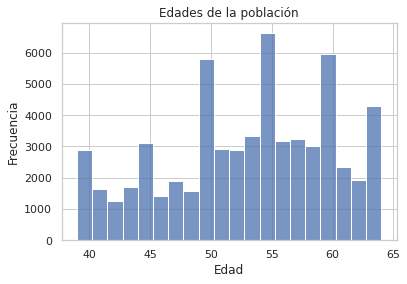

In [25]:
#Histograma
ax=sns.histplot(datos_adultos_filtrado['edad'],bins=20)
print(f"Coeficiente de Asimetría: {round(skew(datos_adultos_filtrado['edad']),2)}")
print(f"Kurtosis: {round(kurtosis(datos_adultos_filtrado['edad']),2):21}\n")
ax.set(xlabel='Edad',ylabel='Frecuencia',title='Edades de la población');

La distribución de peso es asimétrica positiva de cola corta

In [26]:
segmentos = pd.cut(datos_adultos_filtrado['peso'], 25)
datos_adultos_filtrado['edad'].groupby(segmentos).count()

peso
(39.933, 42.68]       87
(42.68, 45.36]       185
(45.36, 48.04]       315
(48.04, 50.72]       541
(50.72, 53.4]       1055
(53.4, 56.08]       2021
(56.08, 58.76]      1816
(58.76, 61.44]      4234
(61.44, 64.12]      4628
(64.12, 66.8]       4849
(66.8, 69.48]       6132
(69.48, 72.16]      6952
(72.16, 74.84]      3069
(74.84, 77.52]      4826
(77.52, 80.2]       5550
(80.2, 82.88]       2015
(82.88, 85.56]      3410
(85.56, 88.24]      2234
(88.24, 90.92]      1977
(90.92, 93.6]       1479
(93.6, 96.28]       1386
(96.28, 98.96]       705
(98.96, 101.64]      754
(101.64, 104.32]     463
(104.32, 107.0]      386
Name: edad, dtype: int64

Coeficiente de Asimetría: 0.36
Kurtosis:                -0.19



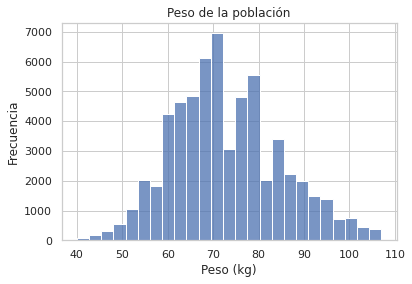

In [27]:
ax=sns.histplot(datos_adultos_filtrado['peso'],bins=25)
print(f"Coeficiente de Asimetría: {round(skew(datos_adultos_filtrado['peso']),2)}")
print(f"Kurtosis: {round(kurtosis(datos_adultos_filtrado['peso']),2):20}\n")
ax.set(xlabel='Peso (kg)',ylabel='Frecuencia',title='Peso de la población');

Podríamos decir que la variable altura es casi simétrica de cola corta.

In [28]:
segmentos = pd.cut(datos_adultos_filtrado['altura'], 20)
datos_adultos_filtrado['altura'].groupby(segmentos).count()

altura
(142.957, 145.15]     210
(145.15, 147.3]       301
(147.3, 149.45]       525
(149.45, 151.6]      1369
(151.6, 153.75]      1790
(153.75, 155.9]      2637
(155.9, 158.05]      6824
(158.05, 160.2]      6176
(160.2, 162.35]      4354
(162.35, 164.5]      5230
(164.5, 166.65]      7115
(166.65, 168.8]      6302
(168.8, 170.95]      6824
(170.95, 173.1]      3899
(173.1, 175.25]      3020
(175.25, 177.4]      1360
(177.4, 179.55]      1452
(179.55, 181.7]       900
(181.7, 183.85]       390
(183.85, 186.0]       391
Name: altura, dtype: int64

Coeficiente de Asimetría: 0.07
Kurtosis:                -0.21



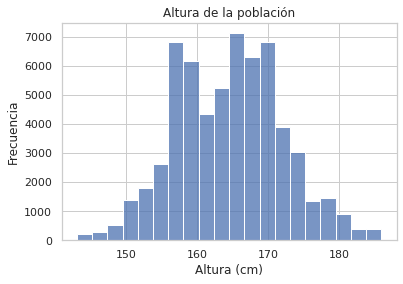

In [29]:
ax=sns.histplot(datos_adultos_filtrado['altura'],bins=20)
print(f"Coeficiente de Asimetría: {round(skew(datos_adultos_filtrado['altura']),2)}")
print(f"Kurtosis: {round(kurtosis(datos_adultos_filtrado['altura']),2):20}\n")
ax.set(xlabel='Altura (cm)',ylabel='Frecuencia',title='Altura de la población');

Es dificil ver el comportamiento de la variable presión sistólica pero, de acuerdo a la curtosis y el coeficiente de asimetría podríamos decir que tiene una distriución asimétrica positiva con cola corta.

In [30]:
segmentos = pd.cut(datos_adultos_filtrado['presion_sistolica'], 8)
datos_adultos_filtrado['presion_sistolica'].groupby(segmentos).count()

presion_sistolica
(94.926, 104.25]     1740
(104.25, 113.5]      8090
(113.5, 122.75]     26766
(122.75, 132.0]      8816
(132.0, 141.25]      8939
(141.25, 150.5]      4115
(150.5, 159.75]       118
(159.75, 169.0]      2485
Name: presion_sistolica, dtype: int64

Coeficiente de Asimetría: 0.7
Kurtosis:                 0.03



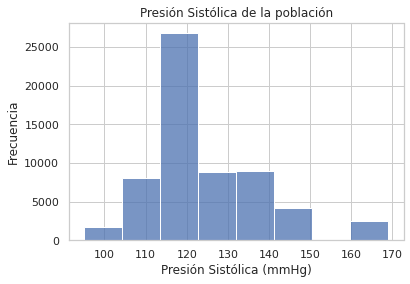

In [31]:
ax=sns.histplot(datos_adultos_filtrado['presion_sistolica'],bins=8)
print(f"Coeficiente de Asimetría: {round(skew(datos_adultos_filtrado['presion_sistolica']),2):1}")
print(f"Kurtosis: {round(kurtosis(datos_adultos_filtrado['presion_sistolica']),2):20}\n")
ax.set(xlabel='Presión Sistólica (mmHg)', ylabel='Frecuencia',title='Presión Sistólica de la población');

Al igual que la presión sistólica, el comportamiento de la presión diastólica es díficil de ver, sin embargo utilizando la curtosis y el coeficiente de asimetría podríamos decir que es asimétrica positiva de cola corta.

In [32]:
segmentos = pd.cut(datos_adultos_filtrado['presion_diastolica'], 5)
datos_adultos_filtrado['presion_diastolica'].groupby(segmentos).count()

presion_diastolica
(65.962, 73.6]     9988
(73.6, 81.2]      34092
(81.2, 88.8]        430
(88.8, 96.4]      13410
(96.4, 104.0]      3149
Name: presion_diastolica, dtype: int64

Coeficiente de Asimetría: 0.45
Kurtosis:                  0.1



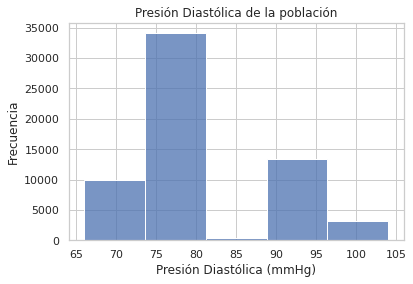

In [33]:
ax=sns.histplot(datos_adultos_filtrado['presion_diastolica'],bins=5)
print(f"Coeficiente de Asimetría: {round(skew(datos_adultos_filtrado['presion_diastolica']),2):1}")
print(f"Kurtosis: {round(kurtosis(datos_adultos_filtrado['presion_diastolica']),2):20}\n")
ax.set(xlabel='Presión Diastólica (mmHg)',ylabel='Frecuencia',title='Presión Diastólica de la población');

## Segmentación de variables numéricas con categóricas

Observemos que el comportamiento de las presiones tanto diastólica como sistólica es distinto entre la población, pues en el caso de las enfermas hay mayor densidad con presiones más altas superando los 130 mmHg, mientras que aquellos que no sufren alguna enfermedad cardiaca tienen una presión sistolica alrededor de 120 mmHg y en el caso de la presión diastolica alrededor de 80 mmHg, que es lo normal.

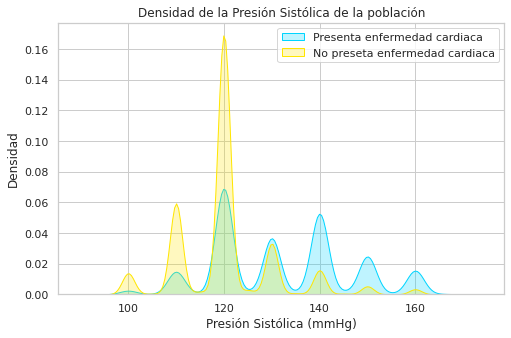

In [34]:
# Veamos el comportamiento de la presión sistolica separando por presencia de enfermedad cardiovascular.
plt.figure(figsize=(8,5))
ax= sns.kdeplot(data=datos_adultos_filtrado,x='presion_sistolica',hue='enfermedad_cardiaca',common_norm=False,shade=True, palette='jet_r')
ax.set(xlabel='Presión Sistólica (mmHg)',ylabel='Densidad',title='Densidad de la Presión Sistólica de la población')
plt.legend(['Presenta enfermedad cardiaca','No preseta enfermedad cardiaca']);

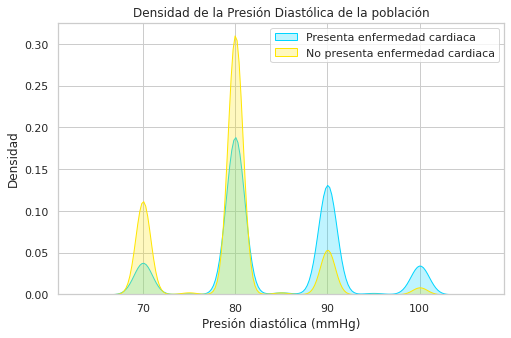

In [35]:
# Veamos el comportamiento de la presión diastolica separando por presencia de enfermedad cardiovascular.
plt.figure(figsize=(8,5))
ax= sns.kdeplot(data=datos_adultos_filtrado,x='presion_diastolica',hue='enfermedad_cardiaca',common_norm=False,shade=True, palette='jet_r')
ax.set(xlabel='Presión diastólica (mmHg)',ylabel='Densidad',title='Densidad de la Presión Diastólica de la población')
plt.legend(['Presenta enfermedad cardiaca','No presenta enfermedad cardiaca']);

Observamos que el comportamiendo de la densidad nos indica que las personas que presentan alguna enfermedad cardiovascular suelen tener un peso mayor con respecto a quienes no presentan enfermedad.

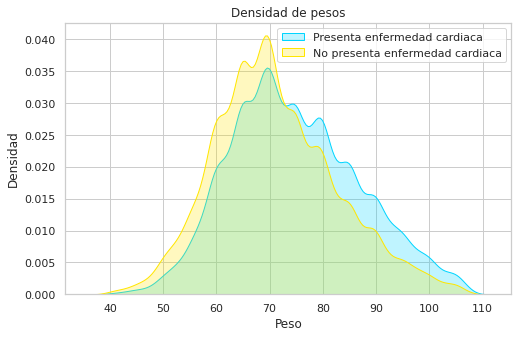

In [36]:
# Veamos el comportamiento de peso separando por presencia de enfermedad cardiovascular.
plt.figure(figsize=(8,5))
ax= sns.kdeplot(data=datos_adultos_filtrado,x='peso',hue='enfermedad_cardiaca',common_norm=False,shade=True, palette='jet_r')
ax.set(xlabel='Peso',ylabel='Densidad',title='Densidad de pesos')
plt.legend(['Presenta enfermedad cardiaca','No presenta enfermedad cardiaca']);

Por lo que no es sorpresa encontrar que los pacientes con ECV, su índice de masa corporal es mayor con respecto al de aquellos que no presentan una enfermedad.

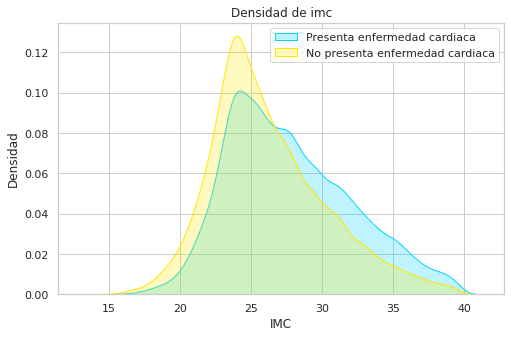

In [37]:
# Veamos el comportamiento de IMC separando por presencia de enfermedad cardiovascular.
plt.figure(figsize=(8,5))
ax= sns.kdeplot(data=datos_adultos_filtrado,x='imc',hue='enfermedad_cardiaca',common_norm=False,shade=True, palette='jet_r')
ax.set(xlabel='IMC',ylabel='Densidad',title='Densidad de imc')
plt.legend(['Presenta enfermedad cardiaca','No presenta enfermedad cardiaca']);



```
# Tiene formato de código
```

Por último, notamos que las personas con edad avanzada son las principales en tener una ECV, lo que indica que el diagnóstico se ha realizado de manera tardía, y es bien sabido que la esperanza de vida de estos pacientes es baja. 

Esta última visualización nos demuestra la importancia de realizar el diagnóstico temprano para evitar que las personas desarrollen la enfermedad.

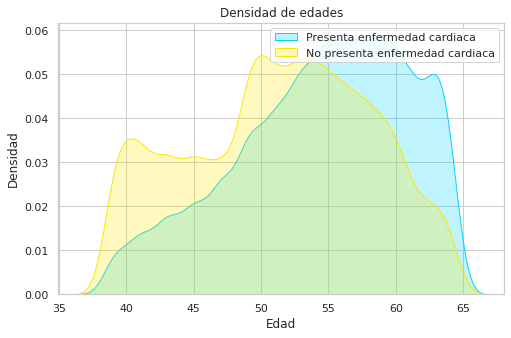

In [38]:
# Veamos el comportamiento de edad separando por presencia de enfermedad cardiovascular.
plt.figure(figsize=(8,5))
ax= sns.kdeplot(data=datos_adultos_filtrado,x='edad',hue='enfermedad_cardiaca',common_norm=False,shade=True, palette='jet_r')
ax.set(xlabel='Edad',ylabel='Densidad',title='Densidad de edades')
plt.legend(['Presenta enfermedad cardiaca','No presenta enfermedad cardiaca']);

##Con esta parte del análisis podemos concluir que las personas con enfermedad ciertamente tienen valores muy elevados en la presión tanto sistólica como diastólica. Así también, podemos deducir que la enfermedad se desarrolla de manera crónica puesto que los pacientes enfermos son los de edad avanzada.

##Por lo anterior, proseguiremos a analizar las variables para encontrar aquellas que mas se relaciones entre sí y con mayor probabilidad de propiciar el desarrollo de una enfermedad cardiovascular.

# Postwork 3

Exploración de variables categóricas y análisis multivariable

## Conteo en variables categoricas


### Graficas de barras

Notamos que hay mas personas que no sufren una enfermedad cardiaca 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


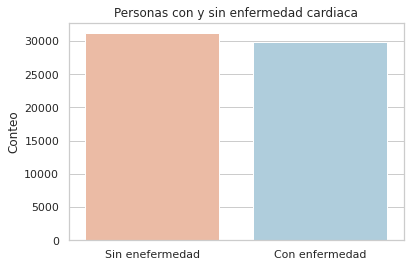

In [39]:
counts=datos_adultos_filtrado['enfermedad_cardiaca'].value_counts()
ax = sns.barplot(counts.index, counts,palette="RdBu")
ax.set_title('Personas con y sin enfermedad cardiaca')
ax.set_xticklabels(['Sin enefermedad','Con enfermedad'])
ax.set(ylabel='Conteo');

La población se compone principalmente de mujeres, en general la población tiene un nivel de glucosa y colesterol dentro de lo normal.

Asimismo, la mayor parte de nuestra población es no fumadora y tampoco son alcohólicos.

Por último, notamos que la mayor parte reportó realizar actividad física.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


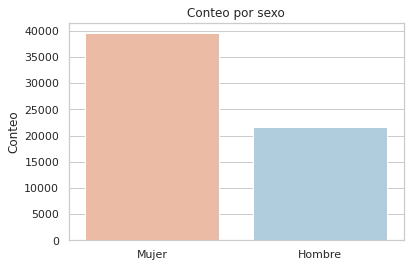

In [40]:
counts=datos_adultos_filtrado['sexo'].value_counts()
ax = sns.barplot(counts.index, counts,palette="RdBu")
ax.set_title('Conteo por sexo')
ax.set_xticklabels(['Mujer','Hombre'])
ax.set(ylabel='Conteo');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


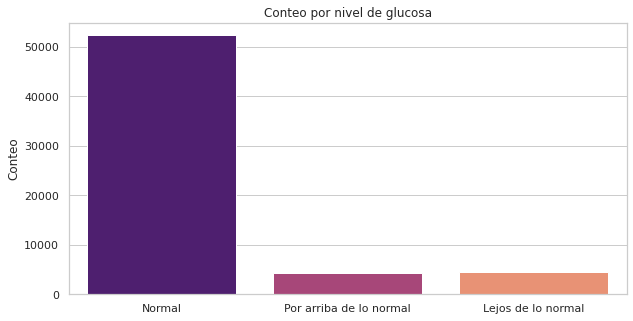

In [41]:
plt.figure(figsize=(10,5))
counts=datos_adultos_filtrado['glucosa'].value_counts()
ax = sns.barplot(counts.index, counts,palette='magma')
ax.set_title('Conteo por nivel de glucosa')
ax.set_xticklabels(['Normal','Por arriba de lo normal','Lejos de lo normal'])
ax.set(ylabel='Conteo');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


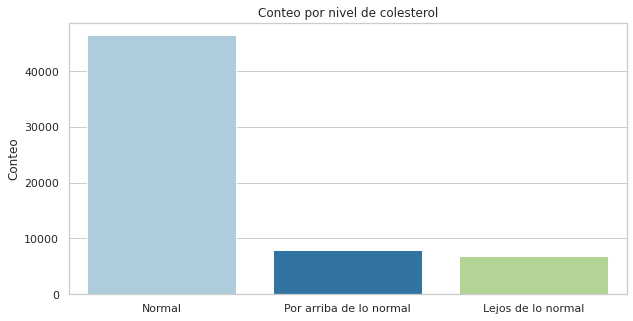

In [42]:
plt.figure(figsize=(10,5))
counts=datos_adultos_filtrado['colesterol'].value_counts()
ax = sns.barplot(counts.index, counts,palette='Paired')
ax.set_title('Conteo por nivel de colesterol')
ax.set_xticklabels(['Normal','Por arriba de lo normal','Lejos de lo normal'])
ax.set(ylabel='Conteo');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


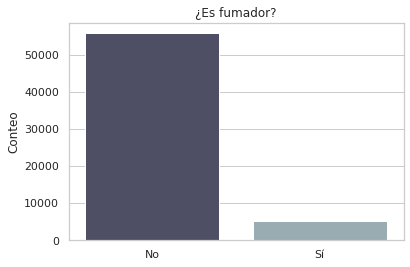

In [43]:
counts=datos_adultos_filtrado['fumador'].value_counts()
ax = sns.barplot(counts.index, counts,palette='bone')
ax.set_title('¿Es fumador?')
ax.set_xticklabels(['No','Sí'])
ax.set(ylabel='Conteo');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


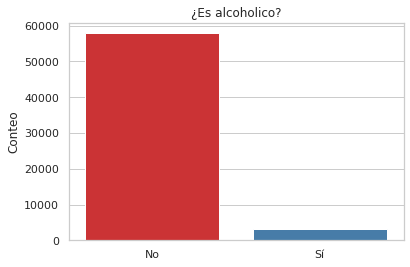

In [44]:
counts=datos_adultos_filtrado['alcoholico'].value_counts()
ax = sns.barplot(counts.index, counts,palette='Set1')
ax.set_title('¿Es alcoholico?')
ax.set_xticklabels(['No','Sí'])
ax.set(ylabel='Conteo');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


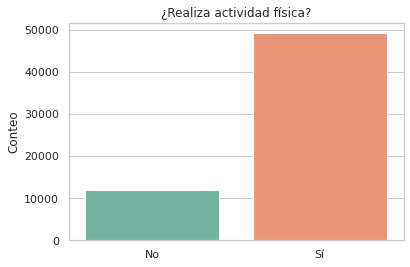

In [45]:
counts=datos_adultos_filtrado['actividad_fisica'].value_counts()
ax = sns.barplot(counts.index, counts,palette='Set2')
ax.set_title('¿Realiza actividad física?')
ax.set_xticklabels(['No','Sí'])
ax.set(ylabel='Conteo');

### Tablas de contingencia y graficas para variables categoricas

Observamos que a pesar de que la población que no sufre una enfermedad cardiaca es mayor, son mas las personas que tienen un nivel de glucosa distinto al normal  que sufren una enfermedad cardiaca, lo que podría indicarnos que este factor influye en la presencia de enfermedades cardiacas.

In [46]:
pd.crosstab(datos_adultos_filtrado['enfermedad_cardiaca'],datos_adultos_filtrado['glucosa'],margins=True, margins_name='Total',colnames=['Nivel de glucosa'],rownames=['Sufre alguna enfermedad cardíaca']).rename(index={0:'No',1:'Sí'},columns={1:'Normal',2:'Por arriba de lo normal',3:'Lejos de lo normal'})

Nivel de glucosa,Normal,Por arriba de lo normal,Lejos de lo normal,Total
Sufre alguna enfermedad cardíaca,,,,
No,27604,1799,1771,31174
Sí,24668,2435,2792,29895
Total,52272,4234,4563,61069


Al igual que el caso anterior, los pacientes con colesterol distinto al normal son mas en el caso de aquellos que sufren alguna enfermedad cardiaca.

In [47]:
pd.crosstab(datos_adultos_filtrado['enfermedad_cardiaca'],datos_adultos_filtrado['colesterol'],margins=True, margins_name='Total',colnames=['Nivel de colesterol'],rownames=['Sufre alguna enfermedad cardíaca']).rename(index={0:'No',1:'Sí'},columns={1:'Normal',2:'Por arriba de lo normal',3:'Lejos de lo normal'})

Nivel de colesterol,Normal,Por arriba de lo normal,Lejos de lo normal,Total
Sufre alguna enfermedad cardíaca,,,,
No,26277,3254,1643,31174
Sí,20056,4687,5152,29895
Total,46333,7941,6795,61069


Observamos que hay mas mujeres que presentan una enfermedad cardiaca, esto puede estar sesgado principalmente porque la población esta compuesta mayormente por mujeres.

In [48]:
pd.crosstab(datos_adultos_filtrado['enfermedad_cardiaca'],datos_adultos_filtrado['sexo'],margins=True, margins_name='Total',colnames=['Sexo'],rownames=['Sufre alguna enfermedad cardíaca']).rename(columns={1:'Mujer',2:'Hombre'},index={0:'No',1:'Sí'})



Sexo,Mujer,Hombre,Total
Sufre alguna enfermedad cardíaca,,,
No,20139,11035,31174
Sí,19392,10503,29895
Total,39531,21538,61069


Notamos que son pocas las personas que sufren alguna enfermedad cardiaca y son alcohólicos y que en particular aquellos que presentan alguna enfermedad reportaron ser no alcohólicos.

In [49]:
pd.crosstab(datos_adultos_filtrado['enfermedad_cardiaca'],datos_adultos_filtrado['alcoholico'],margins=True, margins_name='Total',colnames=['Es alcoholico'],rownames=['Sufre enfermedad cardíaca']).rename(columns={0:'No',1:'Sí'},index={0:'No',1:'Sí'})


Es alcoholico,No,Sí,Total
Sufre enfermedad cardíaca,,,
No,29459,1715,31174
Sí,28425,1470,29895
Total,57884,3185,61069


De aquellos que reportaron presencia de alguna enfermedad cardiaca,  la mayor parte reportó realizar ejercicio. Esto más que una causa de la presencia de enfermedades, podría ser una consecuencia por mejorar sus hábitos de vida, por lo que no podría ser un factor de riesgo en esta población.

In [50]:
pd.crosstab(datos_adultos_filtrado['enfermedad_cardiaca'],datos_adultos_filtrado['actividad_fisica'],margins=True, margins_name='Total',colnames=['Realiza actividad física'],rownames=['Sufre enfermedad cardíaca']).rename(columns={0:'No',1:'Sí'},index={0:'No',1:'Sí'})


Realiza actividad física,No,Sí,Total
Sufre enfermedad cardíaca,,,
No,5643,25531,31174
Sí,6280,23615,29895
Total,11923,49146,61069


Observamos que tanto en personas con enfermedad y sin enfermedad, la mayoria presenta niveles de colesterol normales, sin embargo en el caso de aquellos con enfermedad cardiovascular, el nivel lejos de lo normal rebasa al nivel por encima de lo normal.

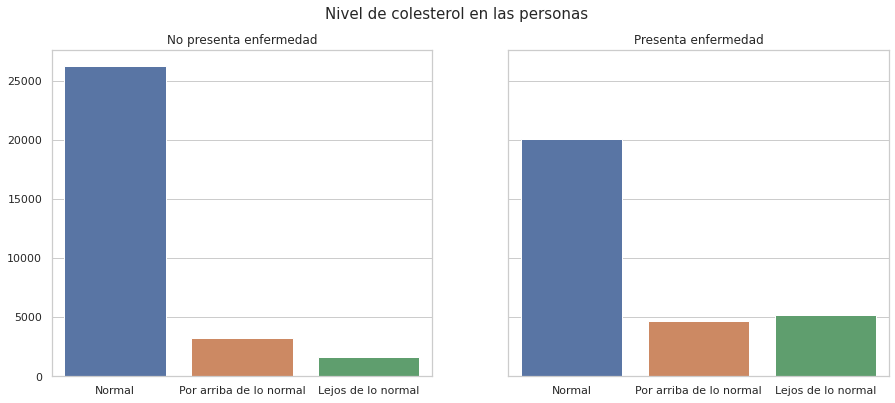

In [51]:
#Comparaciones para variables categoricas
crosstab=pd.crosstab(datos_adultos_filtrado['enfermedad_cardiaca'],datos_adultos_filtrado['colesterol']).rename(columns={1:'Normal',2:'Por arriba de lo normal',3:'Lejos de lo normal'})

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)
sns.barplot(x=crosstab.columns, y=crosstab.loc[0], ax=axes[0])
sns.barplot(x=crosstab.columns, y=crosstab.loc[1], ax=axes[1])
axes[0].set(xlabel='', ylabel='', title='No presenta enfermedad')
axes[1].set(xlabel='', ylabel='', title='Presenta enfermedad')
fig.suptitle('Nivel de colesterol en las personas', fontsize=15);

Lo mismo pasa con el nivel normal de glucosa

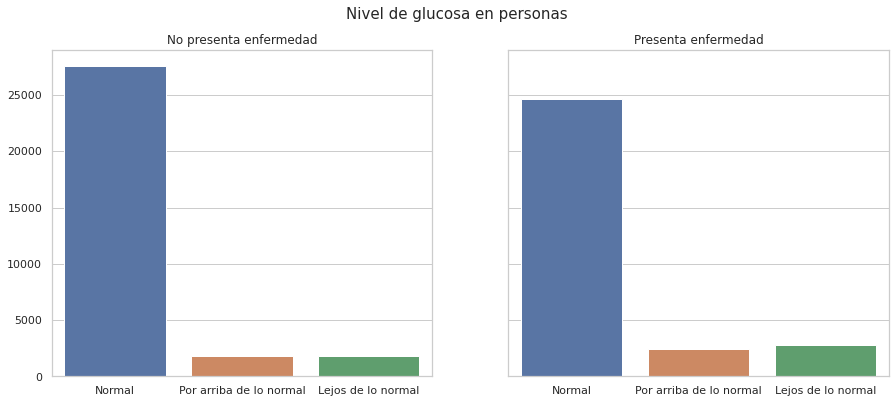

In [52]:
crosstab=pd.crosstab(datos_adultos_filtrado['enfermedad_cardiaca'],datos_adultos_filtrado['glucosa']).rename(columns={1:'Normal',2:'Por arriba de lo normal',3:'Lejos de lo normal'})

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)
sns.barplot(x=crosstab.columns, y=crosstab.loc[0], ax=axes[0])
sns.barplot(x=crosstab.columns, y=crosstab.loc[1], ax=axes[1])
axes[0].set(xlabel='', ylabel='', title='No presenta enfermedad')
axes[1].set(xlabel='', ylabel='', title='Presenta enfermedad')
fig.suptitle('Nivel de glucosa en personas', fontsize=15);

## Gráficos de variables categoricas con númericas

Como se ha observado, el IMC en aquellos pacientes que presentan enfermedades cardiacas tiende  a ser mayor en comparación con las personas que no presentan enfermedad. 
Algo que podemos resaltar en el caso de las presiones es que, aunque hay presencia de datos atipicos en las personas que no presentan enfermedad, los valores en general son menores en los que no tienen enfermedad, con respecto a los niveles de presiones en las personas que sí presentan una enfermedad.

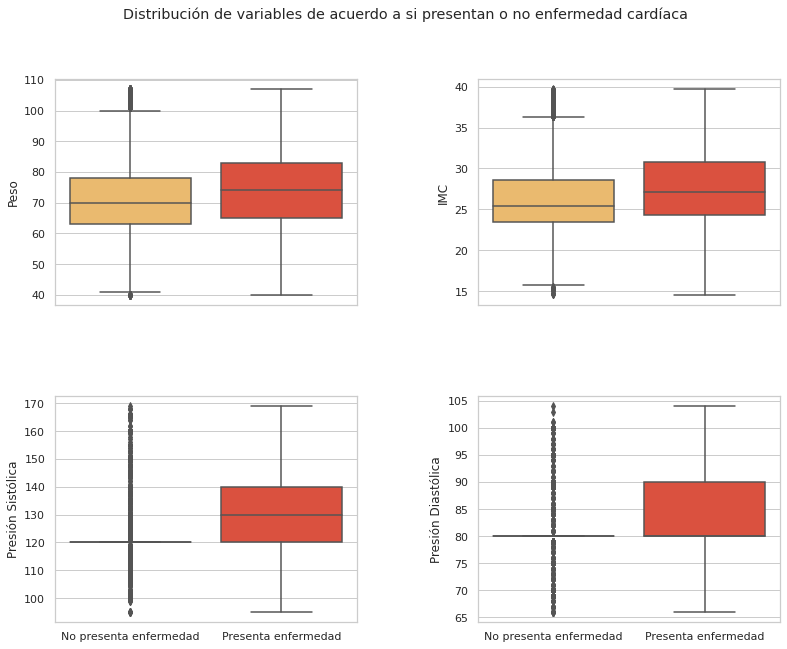

In [53]:
fig,axes=plt.subplots(2,2,figsize=(13,10),sharex=True)
plt.suptitle('Distribución de variables de acuerdo a si presentan o no enfermedad cardíaca')
fig.subplots_adjust(hspace=0.4,wspace=0.4)
sns.boxplot(data=datos_adultos_filtrado,ax=axes[0,0], x='enfermedad_cardiaca', y='peso',palette="YlOrRd")
sns.boxplot(data=datos_adultos_filtrado,ax=axes[0,1], x='enfermedad_cardiaca', y='imc',palette="YlOrRd")
sns.boxplot(data=datos_adultos_filtrado,ax=axes[1,0], x='enfermedad_cardiaca', y='presion_sistolica',palette="YlOrRd")
sns.boxplot(data=datos_adultos_filtrado,ax=axes[1,1], x='enfermedad_cardiaca', y='presion_diastolica',palette="YlOrRd")
axes[1,0].set_xticklabels(('No presenta enfermedad','Presenta enfermedad'))
axes[0,0].set(xlabel='',ylabel="Peso")
axes[0,1].set(xlabel='',ylabel="IMC")
axes[1,0].set(xlabel='',ylabel='Presión Sistólica')
axes[1,1].set(xlabel='',ylabel='Presión Diastólica');

En estas gráficas podemos observas de mejor forma el comportamiento de las presiones, que en el caso de aquellas personas que no sufren una enfermedad cardiaca, su nivel de presión sistólica suele estar alrededor de 120 mmHg y la diastólica alrededor de 80 mmHg, mientras que en el caso de las personas que sí presentan enfermedad, sus valores son cercanas o mayores.

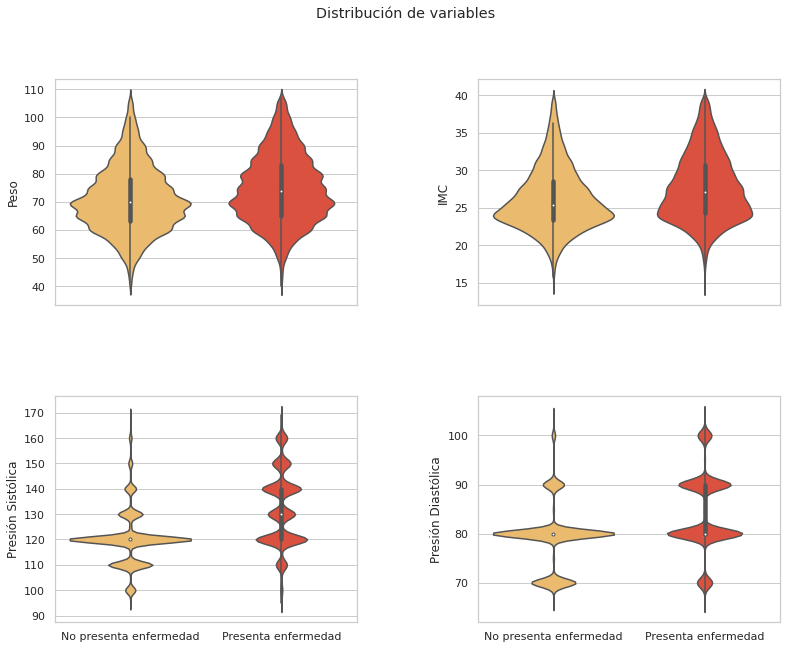

In [54]:
fig,axes=plt.subplots(2,2,figsize=(13,10),sharex=True)
plt.suptitle('Distribución de variables')
fig.subplots_adjust(hspace=0.4,wspace=0.4)
sns.violinplot(data=datos_adultos_filtrado,ax=axes[0,0], x='enfermedad_cardiaca', y='peso',palette="YlOrRd");
sns.violinplot(data=datos_adultos_filtrado,ax=axes[0,1], x='enfermedad_cardiaca', y='imc',palette="YlOrRd");
sns.violinplot(data=datos_adultos_filtrado,ax=axes[1,0], x='enfermedad_cardiaca', y='presion_sistolica',palette="YlOrRd")
sns.violinplot(data=datos_adultos_filtrado,ax=axes[1,1], x='enfermedad_cardiaca', y='presion_diastolica',palette="YlOrRd")
axes[0,0].set(xlabel='',ylabel="Peso")
axes[0,1].set(xlabel='',ylabel="IMC")
axes[1,0].set(xlabel='',ylabel='Presión Sistólica')
axes[1,1].set(xlabel='',ylabel='Presión Diastólica')
axes[1,0].set_xticklabels(('No presenta enfermedad','Presenta enfermedad'));

##Con esta parte del análisis podemos concluir que si bien son más las mujeres con una enfermedad cardiovascular, los hombres son los que mayoritariamente dan positivos a otros factores asociados como el alcoholismo y el hecho de fumar.

##Por lo anterior, proseguiremos a realizar análisis de correlación para identificar aquellas variables que más se relacionan con la enfermedad.

# POSTWORK 4

Correlaciones y regresión linear simple

In [55]:
#Comprobamos que no exista ningún NA dentro de nuestros registros
datos_adultos_filtrado.isna().sum()

edad                   0
sexo                   0
altura                 0
peso                   0
presion_sistolica      0
presion_diastolica     0
colesterol             0
glucosa                0
fumador                0
alcoholico             0
actividad_fisica       0
enfermedad_cardiaca    0
imc                    0
dtype: int64

In [56]:
#Identificamos en qué campos tenemos variables numéricas y en cuáles binarias.
datos_adultos.head()

,edad,sexo,altura,peso,presion_sistolica,presion_diastolica,colesterol,glucosa,fumador,alcoholico,actividad_fisica,enfermedad_cardiaca,imc
0,50,2,168,62,110,80,1,1,0,0,1,0,21.97
1,55,1,156,85,140,90,3,1,0,0,1,1,34.93
2,51,1,165,64,130,70,3,1,0,0,0,1,23.51
3,48,2,169,82,150,100,1,1,0,0,1,1,28.71
4,47,1,156,56,100,60,1,1,0,0,0,0,23.01


In [57]:
#Eliminamos las variables binarias ya que no se ajustarían al mapa de calor y nos quedamos únicamente con las numéricas.

df_sin_binarios = datos_adultos.drop(columns=['sexo','colesterol','glucosa','fumador','alcoholico','actividad_fisica','enfermedad_cardiaca'])

df_sin_binarios.head()

,edad,altura,peso,presion_sistolica,presion_diastolica,imc
0,50,168,62,110,80,21.97
1,55,156,85,140,90,34.93
2,51,165,64,130,70,23.51
3,48,169,82,150,100,28.71
4,47,156,56,100,60,23.01


In [58]:
#Mediante una tabla y de acuerdo a los valores de correlación podemos ver qué variables podrían estar relacionadas.
df_sin_binarios.corr()

,edad,altura,peso,presion_sistolica,presion_diastolica,imc
edad,1.000000,-0.081506,0.053567,0.020854,0.017620,0.085418
altura,-0.081506,1.000000,0.291001,0.005488,0.006150,-0.290583
peso,0.053567,0.291001,1.000000,0.030702,0.043703,0.762067
presion_sistolica,0.020854,0.005488,0.030702,1.000000,0.016086,0.024853
presion_diastolica,0.017620,0.006150,0.043703,0.016086,1.000000,0.035342
imc,0.085418,-0.290583,0.762067,0.024853,0.035342,1.000000


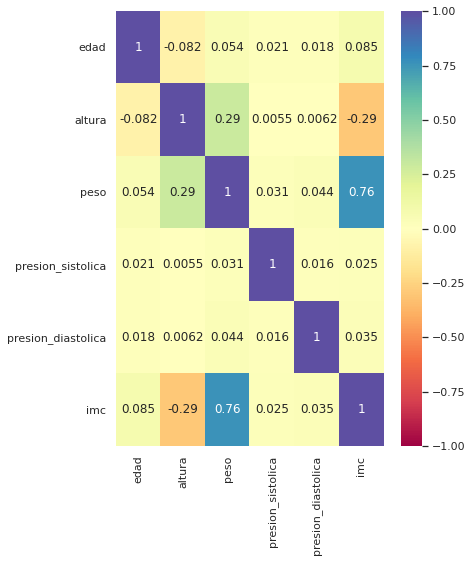

In [59]:
#Graficamos un mapa de calor para visualizar más rápidamente qué variables tienen una correlación.
plt.figure(figsize=(6,8))
ax = sns.heatmap(df_sin_binarios.corr(), vmin= -1, vmax=1, annot= True, cmap= 'Spectral')

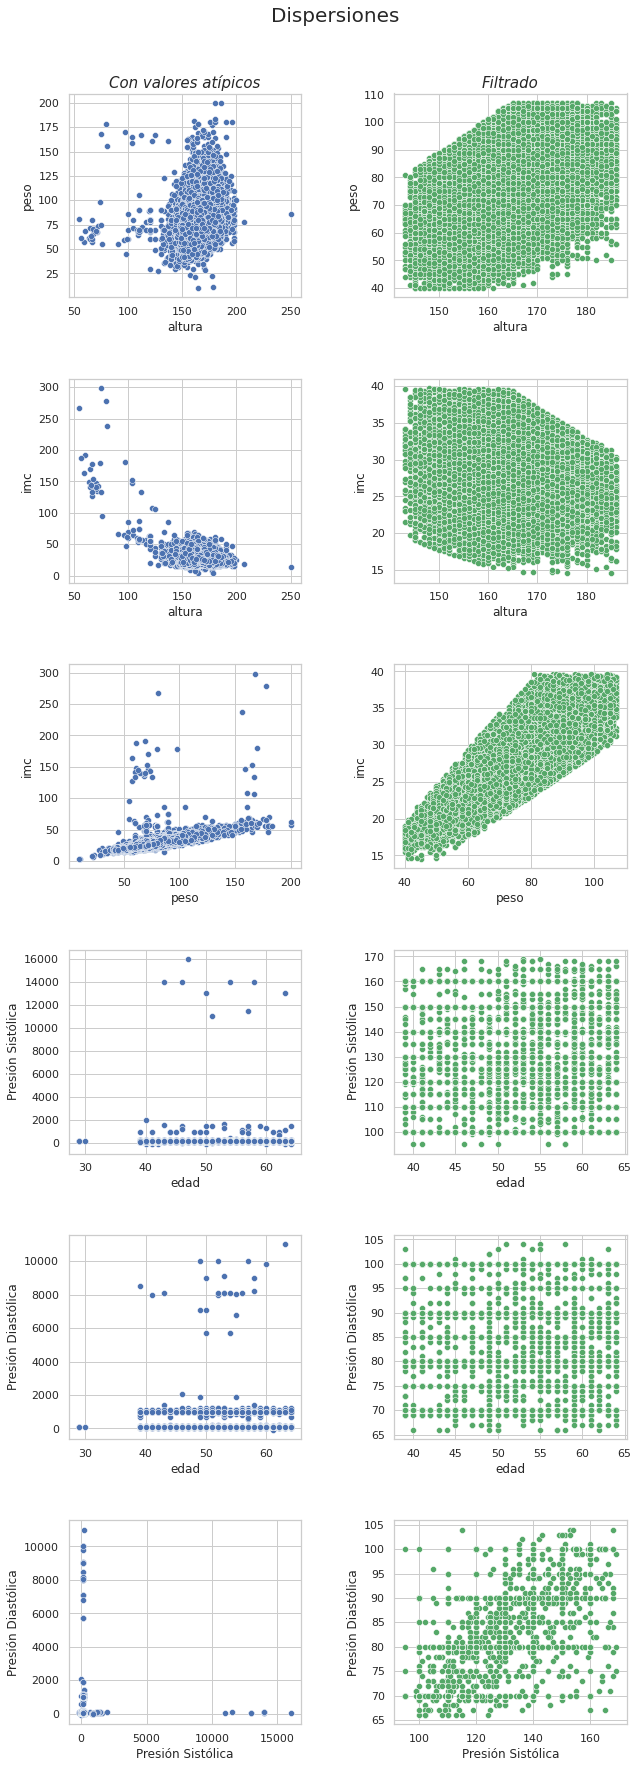

In [60]:
# Creamos una imagen que contenga los graficos de dispersión para comparar las distribuciones originales
#contra las distribuciones de los datos filtrados.
fig,axes=plt.subplots(6,2,figsize=(10,30))
fig.suptitle("Dispersiones ",fontsize=20,y=0.92)
fig.subplots_adjust(hspace=0.4,wspace=0.4)

sns.scatterplot(x=datos_adultos['altura'],y=datos_adultos['peso'],ax=axes[0,0])
sns.scatterplot(x=datos_adultos['altura'],y=datos_adultos['imc'],ax=axes[1,0])
sns.scatterplot(x=datos_adultos['peso'],y=datos_adultos['imc'],ax=axes[2,0])
sns.scatterplot(x=datos_adultos['edad'],y=datos_adultos['presion_sistolica'],ax=axes[3,0])
sns.scatterplot(x=datos_adultos['edad'],y=datos_adultos['presion_diastolica'],ax=axes[4,0])
sns.scatterplot(x=datos_adultos['presion_sistolica'],y=datos_adultos['presion_diastolica'],ax=axes[5,0])

sns.scatterplot(x=datos_adultos_filtrado['altura'],y=datos_adultos_filtrado['peso'],ax=axes[0,1],color='g')
sns.scatterplot(x=datos_adultos_filtrado['altura'],y=datos_adultos_filtrado['imc'],ax=axes[1,1],color='g')
sns.scatterplot(x=datos_adultos_filtrado['peso'],y=datos_adultos_filtrado['imc'],ax=axes[2,1],color='g')
sns.scatterplot(x=datos_adultos_filtrado['edad'],y=datos_adultos_filtrado['presion_sistolica'],ax=axes[3,1],color='g')
sns.scatterplot(x=datos_adultos_filtrado['edad'],y=datos_adultos_filtrado['presion_diastolica'],ax=axes[4,1],color='g')
sns.scatterplot(x=datos_adultos_filtrado['presion_sistolica'],y=datos_adultos_filtrado['presion_diastolica'],ax=axes[5,1],color='g')


#agregamos algunos titulos y nombres a los ejes
axes[0,0].set_title('Con valores atípicos',fontsize=15,style='italic')
axes[0,1].set_title('Filtrado',fontsize=15,style='italic')
axes[3,0].set(ylabel='Presión Sistólica')
axes[3,1].set(ylabel='Presión Sistólica') 
axes[4,0].set(ylabel='Presión Diastólica')
axes[4,1].set(ylabel='Presión Diastólica')
axes[5,0].set(ylabel='Presión Diastólica',xlabel='Presión Sistólica')
axes[5,1].set(ylabel='Presión Diastólica',xlabel='Presión Sistólica');

Se pueden observar en los gráficos de dispersión valores atípicos que claramente pueden atribuirse a errores en el llenado de los registros, ya que no puede haber personas con valores de presión en el orden de los miles mmHg, así como tampoco con índices de masa corporal tan elevados.

Por lo consiguiente, tomamos la base sin datos atípicos para realizar los análisis de correlación y regresión.


In [61]:
df_sin_binarios_filtrado = datos_adultos_filtrado.drop(columns=['sexo','colesterol','glucosa','fumador','alcoholico','actividad_fisica','enfermedad_cardiaca'])

df_sin_binarios_filtrado.corr()

,edad,altura,peso,presion_sistolica,presion_diastolica,imc
edad,1.000000,-0.092339,0.050512,0.201367,0.143636,0.106818
altura,-0.092339,1.000000,0.349334,-0.005206,0.011996,-0.214200
peso,0.050512,0.349334,1.000000,0.223579,0.205531,0.836723
presion_sistolica,0.201367,-0.005206,0.223579,1.000000,0.703347,0.235165
presion_diastolica,0.143636,0.011996,0.205531,0.703347,1.000000,0.206264
imc,0.106818,-0.214200,0.836723,0.235165,0.206264,1.000000


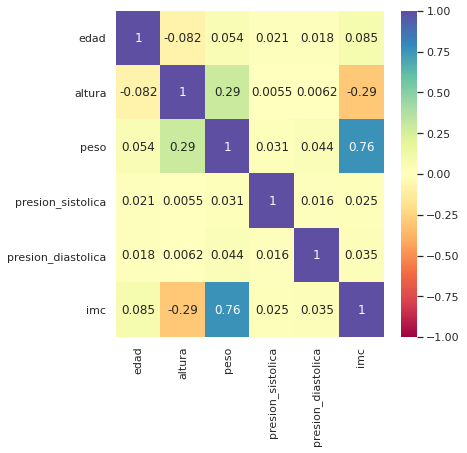

In [62]:
#Heatmap con datos sin filtrar
plt.figure(figsize=(6,6))
ax = sns.heatmap(df_sin_binarios.corr(), vmin= -1, vmax=1, annot= True, cmap= 'Spectral')

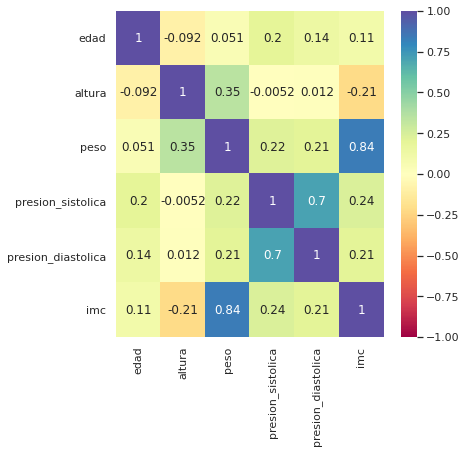

In [63]:
#Heatmap con datos filtrados
plt.figure(figsize=(6,6))
ax = sns.heatmap(df_sin_binarios_filtrado.corr(), vmin= -1, vmax=1, annot= True, cmap= 'Spectral')

Como podemos ver, las variables peso vs imc (índice de masa corporal) tienen una correlación muy fuerte, de 0.84, lo que es lógico ya que el imc es directamente proporcional al peso, mientras que el imc con la altura tiene una correlación negativa.

Además, las presiones también parecen estar correlacionadas entre sí. Ya que como vemos, la presión sistólica vs presión diastólica tienen una correlación de 0.7, lo que también es plausible ya que ambas presiones tienen origen en la eyección sanguínea del corazón.

Así mismo las variables peso y altura estan correlacionadas positivamente.

Finalmente, aunque en menor medida, notamos una correlación entre las presiones con la edad, el peso y por esta razón con el imc.

## Regresión lineal

A continuación trataremos que ajustar algunos modelos de regresión lineal de nuestros datos filtrados.

El primer modalo creado se realizó para las varibales imc y peso, pues como observamos en el mapa de calor, estas fueron las variables que presentaron la mayor correlación.
Con el modelo creado, se puede explicar el 70% de los datos lo cual confirmamos con el método de validación cruzada.

In [64]:
from sklearn.linear_model import LinearRegression

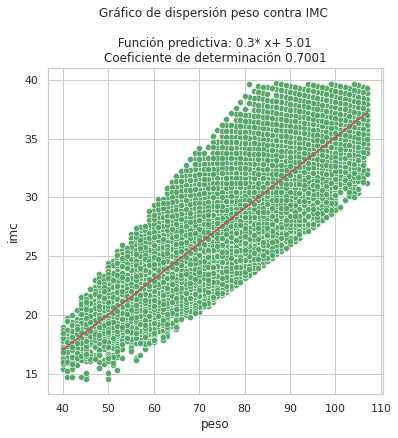

In [65]:
lr=LinearRegression()
lr.fit(datos_adultos_filtrado['peso'].to_frame(),datos_adultos_filtrado['imc'])
y_predict=lr.predict(datos_adultos_filtrado['peso'].to_frame())

plt.figure(figsize=(6,6))
plt.title(f"Gráfico de dispersión peso contra IMC \n\n Función predictiva: {round(lr.coef_[0],2)}* x+ {round(lr.intercept_,2)} \nCoeficiente de determinación {round(lr.score(datos_adultos_filtrado['peso'].to_frame(),datos_adultos_filtrado['imc']),4)}")
sns.scatterplot(x=datos_adultos_filtrado['peso'],y=datos_adultos_filtrado['imc'],color='g')
sns.lineplot(x=datos_adultos_filtrado['peso'],y=y_predict,color='r');



In [66]:
#Validación cruzada del modelo
X= datos_adultos_filtrado['peso'].to_frame()
y= datos_adultos_filtrado['imc']
lr= LinearRegression()
scores = cross_validate(lr, X, y, scoring='r2')
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.700 +/- 0.002


El siguiente modelo se creó para las variables presión sistólica y diastólica pues presentaron una correlación de 0.7, sin embargo con el modelo creado solo se logra una explicación del 49% de los datos lo cual confirmamos con el método de validación cruzada.

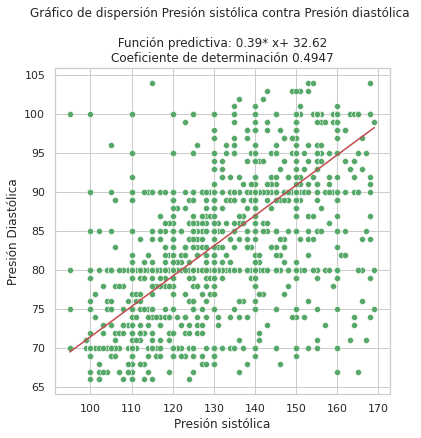

In [67]:
lr=LinearRegression()
lr.fit(datos_adultos_filtrado['presion_sistolica'].to_frame(),datos_adultos_filtrado['presion_diastolica'])
y_predict=lr.predict(datos_adultos_filtrado['presion_sistolica'].to_frame())


plt.figure(figsize=(6,6))
plt.title(f"Gráfico de dispersión Presión sistólica contra Presión diastólica \n\n Función predictiva: {round(lr.coef_[0],2)}* x+ {round(lr.intercept_,2)} \nCoeficiente de determinación {round(lr.score(datos_adultos_filtrado['presion_sistolica'].to_frame(),datos_adultos_filtrado['presion_diastolica']),4)}")
aux=sns.scatterplot(x=datos_adultos_filtrado['presion_sistolica'],y=datos_adultos_filtrado['presion_diastolica'],color='g')
sns.lineplot(x=datos_adultos_filtrado['presion_sistolica'],y=y_predict,color='r');
aux.set(xlabel='Presión sistólica', ylabel='Presión Diastólica' );

In [68]:
#Validación cruzada del modelo
X= datos_adultos_filtrado['presion_sistolica'].to_frame()
y= datos_adultos_filtrado['presion_diastolica']
lr= LinearRegression()
scores = cross_validate(lr, X, y, scoring='r2')
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.495 +/- 0.013


Finalmente, se creó un modelo para las variables peso y altura pues su correlación fue de 0.35, sin embargo el modelo explica muy poco.

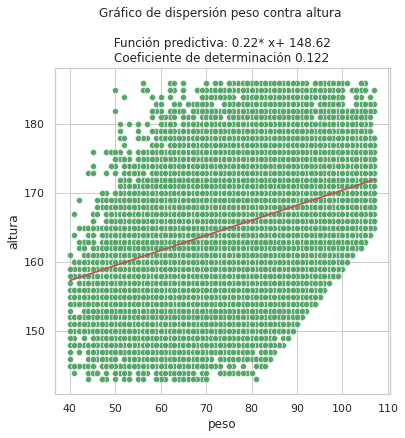

In [69]:
lr=LinearRegression()
lr.fit(datos_adultos_filtrado['peso'].to_frame(),datos_adultos_filtrado['altura'])
y_predict=lr.predict(datos_adultos_filtrado['peso'].to_frame())

plt.figure(figsize=(6,6))
plt.title(f"Gráfico de dispersión peso contra altura \n\n Función predictiva: {round(lr.coef_[0],2)}* x+ {round(lr.intercept_,2)} \nCoeficiente de determinación {round(lr.score(datos_adultos_filtrado['peso'].to_frame(),datos_adultos_filtrado['altura']),4)}")
sns.scatterplot(x=datos_adultos_filtrado['peso'],y=datos_adultos_filtrado['altura'],color='g')
sns.lineplot(x=datos_adultos_filtrado['peso'],y=y_predict,color='r');


In [70]:
#Validación cruzada del modelo
X= datos_adultos_filtrado['peso'].to_frame()
y= datos_adultos_filtrado['altura']
lr= LinearRegression()
scores = cross_validate(lr, X, y, scoring='r2')

print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.122 +/- 0.007


##Hasta aquí hemos encontrado una fuerte correlación entre el peso y el imc que como se sabe, están fuertemente correlacionados, se usó para validar los análisis con las demás variables.

##Solo encontramos correlación (dentro de las variables numéricas) entre las presiones, por lo que usaremos éstas variables para realizar análisis de regresión multivariada.

# Postwork 5

## Intervalos de confianza

In [71]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Los intervalos que seran creados serán del 95% de confianza. 

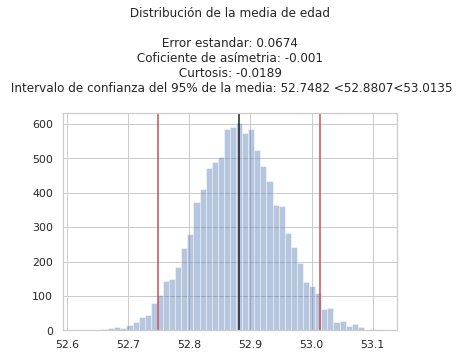

In [72]:
promedio=pd.Series([datos_adultos_filtrado['edad'].sample(n=10_000,replace=True).mean() for i in range(10_000)])
sns.distplot(promedio,kde=False,norm_hist=False)

#intervalos de confianza
#95% DE INTERVALO DE CONFIANZA
limite_inferior=promedio.quantile(.025)
limite_superior=promedio.quantile(.975)
plt.axvline(limite_inferior,color='r')
plt.axvline(limite_superior,color='r')
plt.axvline(promedio.mean(),color='k')
plt.title(f" Distribución de la media de edad \n\n Error estandar: {round(promedio.std(),4)} \n Coficiente de asímetria: {round(promedio.skew(),4)} \n Curtosis: {round(promedio.kurtosis(),4)} \n Intervalo de confianza del 95% de la media: {round(limite_inferior,4)} <{round(promedio.mean(),4)}<{round(limite_superior,4)}\n ");


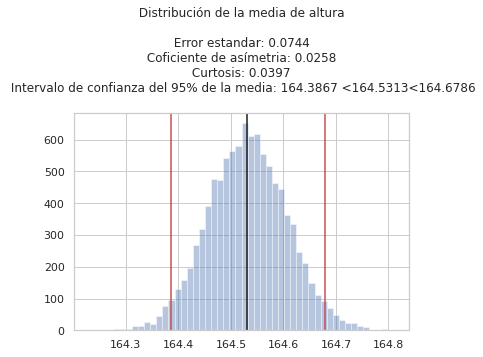

In [73]:
promedio=pd.Series([datos_adultos_filtrado['altura'].sample(n=10_000,replace=True).mean() for i in range(10_000)])
sns.distplot(promedio,kde=False,norm_hist=False)

#intervalos de confianza
#95% DE INTERVALO DE CONFIANZA
limite_inferior=promedio.quantile(.025)
limite_superior=promedio.quantile(.975)
plt.axvline(limite_inferior,color='r')
plt.axvline(limite_superior,color='r')
plt.axvline(promedio.mean(),color='k')
plt.title(f" Distribución de la media de altura \n\n Error estandar: {round(promedio.std(),4)} \n Coficiente de asímetria: {round(promedio.skew(),4)} \n Curtosis: {round(promedio.kurtosis(),4)} \n Intervalo de confianza del 95% de la media: {round(limite_inferior,4)} <{round(promedio.mean(),4)}<{round(limite_superior,4)}\n ");


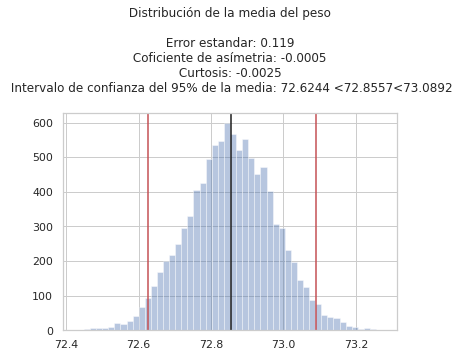

In [74]:
promedio=pd.Series([datos_adultos_filtrado['peso'].sample(n=10_000,replace=True).mean() for i in range(10_000)])
sns.distplot(promedio,kde=False,norm_hist=False)

#intervalos de confianza
#95% DE INTERVALO DE CONFIANZA
limite_inferior=promedio.quantile(.025)
limite_superior=promedio.quantile(.975)
plt.axvline(limite_inferior,color='r')
plt.axvline(limite_superior,color='r')
plt.axvline(promedio.mean(),color='k')
plt.title(f" Distribución de la media del peso \n\n Error estandar: {round(promedio.std(),4)} \n Coficiente de asímetria: {round(promedio.skew(),4)} \n Curtosis: {round(promedio.kurtosis(),4)} \n Intervalo de confianza del 95% de la media: {round(limite_inferior,4)} <{round(promedio.mean(),4)}<{round(limite_superior,4)}\n ");


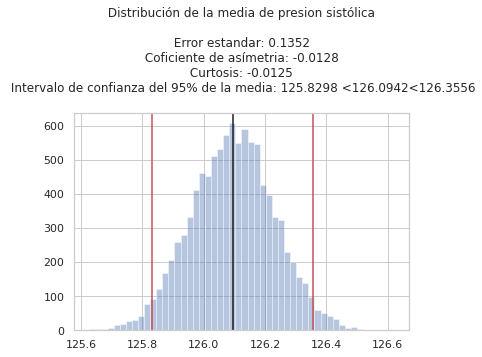

In [75]:
promedio=pd.Series([datos_adultos_filtrado['presion_sistolica'].sample(n=10_000,replace=True).mean() for i in range(10_000)])
sns.distplot(promedio,kde=False,norm_hist=False)

#intervalos de confianza
#95% DE INTERVALO DE CONFIANZA
limite_inferior=promedio.quantile(.025)
limite_superior=promedio.quantile(.975)
plt.axvline(limite_inferior,color='r')
plt.axvline(limite_superior,color='r')
plt.axvline(promedio.mean(),color='k')
plt.title(f" Distribución de la media de presion sistólica \n\n Error estandar: {round(promedio.std(),4)} \n Coficiente de asímetria: {round(promedio.skew(),4)} \n Curtosis: {round(promedio.kurtosis(),4)} \n Intervalo de confianza del 95% de la media: {round(limite_inferior,4)} <{round(promedio.mean(),4)}<{round(limite_superior,4)}\n ");


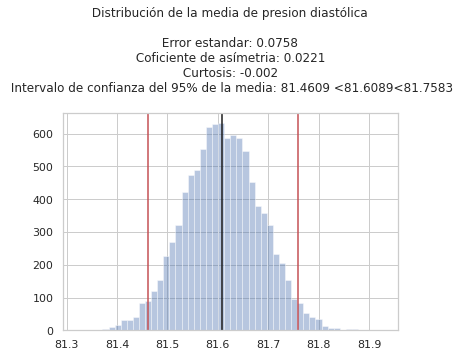

In [76]:
promedio=pd.Series([datos_adultos_filtrado['presion_diastolica'].sample(n=10_000,replace=True).mean() for i in range(10_000)])
sns.distplot(promedio,kde=False,norm_hist=False)

#intervalos de confianza
#95% DE INTERVALO DE CONFIANZA
limite_inferior=promedio.quantile(.025)
limite_superior=promedio.quantile(.975)
plt.axvline(limite_inferior,color='r')
plt.axvline(limite_superior,color='r')
plt.axvline(promedio.mean(),color='k')
plt.title(f" Distribución de la media de presion diastólica \n\n Error estandar: {round(promedio.std(),4)} \n Coficiente de asímetria: {round(promedio.skew(),4)} \n Curtosis: {round(promedio.kurtosis(),4)} \n Intervalo de confianza del 95% de la media: {round(limite_inferior,4)} <{round(promedio.mean(),4)}<{round(limite_superior,4)}\n ");


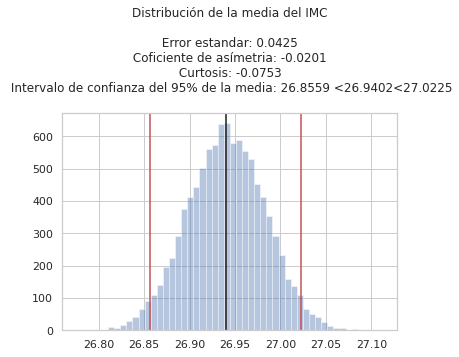

In [77]:
promedio=pd.Series([datos_adultos_filtrado['imc'].sample(n=10_000,replace=True).mean() for i in range(10_000)])
sns.distplot(promedio,kde=False,norm_hist=False)

#intervalos de confianza
#95% DE INTERVALO DE CONFIANZA
limite_inferior=promedio.quantile(.025)
limite_superior=promedio.quantile(.975)
plt.axvline(limite_inferior,color='r')
plt.axvline(limite_superior,color='r')
plt.axvline(promedio.mean(),color='k')
plt.title(f"Distribución de la media del IMC\n\n Error estandar: {round(promedio.std(),4)} \n Coficiente de asímetria: {round(promedio.skew(),4)} \n Curtosis: {round(promedio.kurtosis(),4)} \n Intervalo de confianza del 95% de la media: {round(limite_inferior,4)} <{round(promedio.mean(),4)}<{round(limite_superior,4)}\n ");


## Modelos de regresión múltiple

In [78]:
from sklearn.model_selection import train_test_split

Comenzamos con la regresión múltiple para predecir el imc con respecto del peso y la altura.
Como era de esperarse, existe una regresión entre estas variables pues el imc depende del peso y la altura.

In [79]:
X = datos_adultos_filtrado[['peso', 'altura']]
y = datos_adultos_filtrado['imc']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
lr = LinearRegression()
lr.fit(X_training, y_training)

lr = LinearRegression()
lr.fit(X_training, y_training)
lr.score(X_test, y_test)

0.9922803065580392

Observamos que a través del método de validación cruzada, la media de los score no varía, por lo que podriamos decir que el modelo nos sirve para predecir el imc como variable dependiene y el peso y la altura como independientes.

In [80]:
scores = cross_validate(lr, X, y, scoring='r2')
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.992 +/- 0.000


Observamos que la presión diastólica tiene una correlación con la presión sistólica, peso, imc y edad por lo que crearemos un modelo para ésta sin incluir el peso pues estí implícito en los cálculos del imc.

In [81]:
X = datos_adultos_filtrado[['presion_diastolica','imc','edad']]
y = datos_adultos_filtrado['presion_sistolica']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
lr = LinearRegression()
lr.fit(X_training, y_training)
lr = LinearRegression()
lr.fit(X_training, y_training)
lr.score(X_test, y_test)

0.5110538062409614

Notamos que a pesar de que las variables independientes tienen una correlación con la variable presión sistólica, estas no nos sirven para explicar su comportamiento de manera lineal, pues los score son considerablemente bajos.

In [82]:
scores = cross_validate(lr, X, y, scoring='r2')
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.512 +/- 0.012


##Por lo anterior concluimos que alguna de las otras variables como el ser fumador, alcohólico, o los grados de colesterol y glucosa (categóricas y binarias) también tendrían que estar propiciando de manera importante al desarrollo de ECV. 

# POSTWORK 6

En este apartado realizamos gráficos avanzados para tener una mejor visualización del comportamiento de nuestras variables de interés.

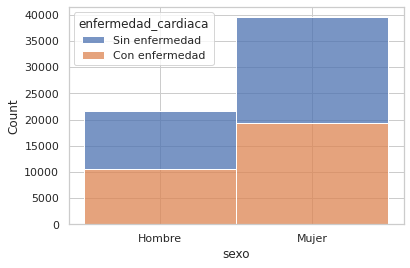

In [83]:
datos=datos_adultos_filtrado.copy()
datos['sexo']=datos.sexo.replace({1:'Mujer',2:'Hombre'})
datos['enfermedad_cardiaca']=datos.enfermedad_cardiaca.replace({1:'Con enfermedad', 0:'Sin enfermedad'})
sns.histplot(data=datos, x="sexo", hue='enfermedad_cardiaca', multiple='stack');

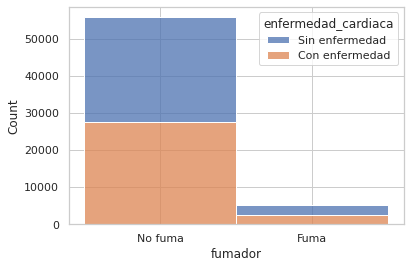

In [84]:
datos['fumador']=datos.fumador.replace({1:'Fuma',0:'No fuma'})
sns.histplot(data=datos, x="fumador", hue='enfermedad_cardiaca', multiple='stack');

[Text(0, 0.5, 'Presion sistolica'), Text(0.5, 0, 'Presión diastolica')]

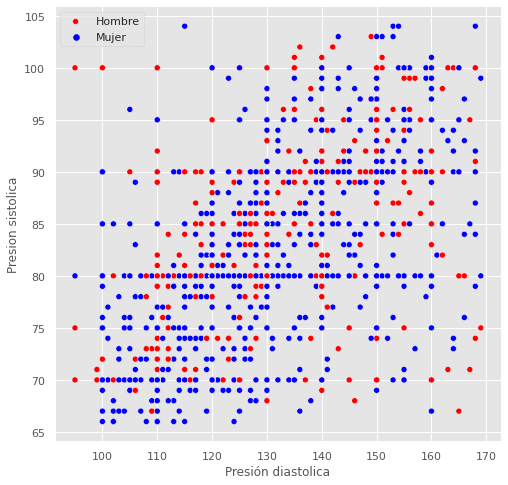

In [85]:
#Veamos el comportamiento de las presiones con respecto al sexo
#1:mujer 2:hombre
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
ax=sns.scatterplot(datos_adultos_filtrado['presion_sistolica'],datos_adultos_filtrado['presion_diastolica'],hue=datos_adultos_filtrado['sexo'],palette='bwr')
plt.legend(['Hombre','Mujer'])
ax.set(xlabel='Presión diastolica',ylabel='Presion sistolica')


[Text(0, 0.5, 'Presion sistolica'), Text(0.5, 0, 'Presión diastolica')]

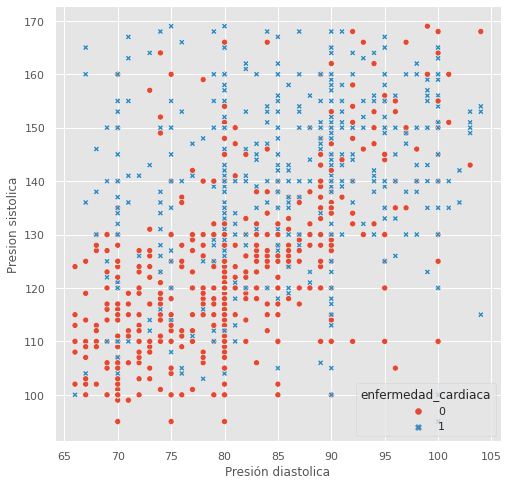

In [86]:
#Veamos el comportamiento de las presiones con respecto a si padecen o no una enfermedad cardiaca

plt.figure(figsize=(8,8))
ax=sns.scatterplot(datos_adultos_filtrado['presion_diastolica'],datos_adultos_filtrado['presion_sistolica'],hue=datos_adultos_filtrado['enfermedad_cardiaca'],style=datos_adultos_filtrado['enfermedad_cardiaca'])
ax.set(xlabel='Presión diastolica',ylabel='Presion sistolica')


Con lo antrior notamos que las personas con enfermedad cardiaca presentamn mayores niveles de presiones principalmente de la presión sistolica.

In [87]:
pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 291kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [88]:
datos_adultos_filtrado.columns

Index(['edad', 'sexo', 'altura', 'peso', 'presion_sistolica',
       'presion_diastolica', 'colesterol', 'glucosa', 'fumador', 'alcoholico',
       'actividad_fisica', 'enfermedad_cardiaca', 'imc'],
      dtype='object')

In [89]:
import plotly.express as px
fig=px.treemap(datos,path=['enfermedad_cardiaca','sexo','fumador'],color='presion_sistolica')
fig.show()

In [90]:
import plotly.express as px
fig=px.treemap(datos,path=['enfermedad_cardiaca','sexo','fumador'],color='edad')
fig.show()

# Postwork 8
# Regresión logistica

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #divide el df en entrenamiento y prueba

Aunque el modelos que se cree puede ser generalizado para hombres y mujeres, se decidio trabajar por separado el modelo para cada sexo, pues como se vio anteriormente, la población esta conformada principalmente por mujeres, lo cual podría influir en un mal modelo.

In [92]:
#Creamosdos dataframes separados para hombres y mujeres.
datos_adultos_filtrado_mujeres=datos_adultos_filtrado[datos_adultos_filtrado['sexo']==1]
datos_adultos_filtrado_hombres=datos_adultos_filtrado[datos_adultos_filtrado['sexo']==2]

## modelo de hombres

In [93]:
#Creamos nuestras variables para entrenar nuestro modelo para los hombres.
#Se eliminan las variables de peso y altura pues estas estan relacionadas con el imc 
X = datos_adultos_filtrado_hombres.drop(columns=['enfermedad_cardiaca','peso','altura','sexo'])
y=datos_adultos_filtrado_hombres['enfermedad_cardiaca']
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=5_000)
#modelo
log_reg= LogisticRegression(max_iter=10_000,) 
log_reg.fit(X_train,y_train)
#prediccion
y_pred= log_reg.predict(X_test)
#Veamos que tan bueno es el modelo
log_reg.score(X_test,y_test)

0.7214484679665738

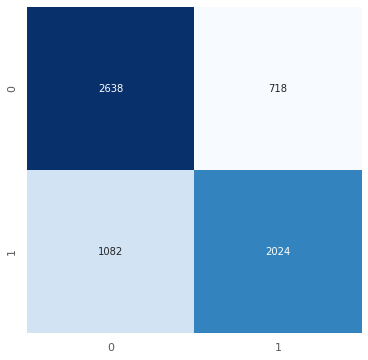

In [94]:
#Creamos la matriz de confusión
cnf_matrix= metrics.confusion_matrix(y_test,y_pred)
class_names= [0,1]
fig,ax=plt.subplots(figsize=(6,6))
ticks_marks=np.arange(len(class_names))

plt.xticks(ticks_marks,class_names)
plt.yticks(ticks_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix),cmap='Blues',cbar=False,annot=True,fmt='g');


Una vez obtenida nuestra matriz de confusión, podemos utilizar 4 medidas de evaluación del modelo, las cuales son Precisión, Exactitud,Sensibilidad y Especificidad

In [95]:
VN,FP,FN,VP= cnf_matrix.ravel()
precision= VP/(VP+FP)
exactitud= (VP+VN)/(VP+VN+FN+FP)
sensibilidad = VP/(VP+FN) 
especificidad= VN/(VN+FP) 
print('Medidas de evaluación para el modelo de hombres')
print(f'Precisión:{round(precision,3):10} ')
print(f'Exactitud:{round(exactitud,3):10} ')
print(f'Sensibilidad:{round(sensibilidad,3):7} ')
print(f'Especificidad:{round(especificidad,3):6} ')

Medidas de evaluación para el modelo de hombres
Precisión:     0.738 
Exactitud:     0.721 
Sensibilidad:  0.652 
Especificidad: 0.786 


In [96]:
# Curva ROC/ AUC
from sklearn.metrics import roc_curve, auc

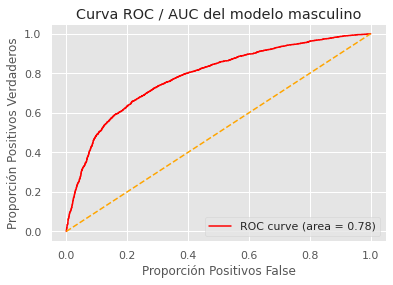

In [97]:
#valores probabilisticos
y_pred_proba = log_reg.predict_proba(X_test)
#Valores para el grafico
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

#Gráfico
plt.figure()
plt.plot(fpr, tpr, color='red',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC del modelo masculino')
plt.legend(loc="lower right")
plt.show()

## Modelo  para mujeres.

In [98]:
#Creamos nuestras variables para entrenar nuestro modelo para mujeres.
X = datos_adultos_filtrado_mujeres.drop(columns=['enfermedad_cardiaca','peso','altura','sexo'])
y=datos_adultos_filtrado_mujeres['enfermedad_cardiaca']
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=5_000)
#modelo
log_reg= LogisticRegression(max_iter=10_000,) 
log_reg.fit(X_train,y_train)
#prediccion
y_pred= log_reg.predict(X_test)
#Veamos que tan bueno es el modelo
log_reg.score(X_test,y_test)

0.711973018549747

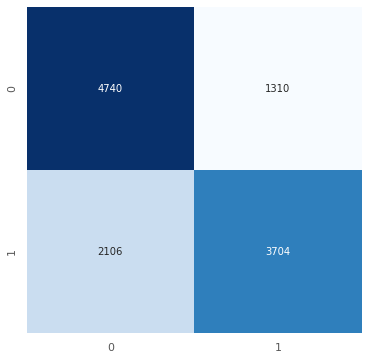

In [99]:
#Creamos la matriz de confusión
cnf_matrix= metrics.confusion_matrix(y_test,y_pred)
class_names= [0,1]
fig,ax=plt.subplots(figsize=(6,6))
ticks_marks=np.arange(len(class_names))

plt.xticks(ticks_marks,class_names)
plt.yticks(ticks_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix),cmap='Blues',cbar=False,annot=True,fmt='g');

Una vez obtenida nuestra matriz de confusión, podemos utilizar 4 medidas de evaluación del modelo, las cuales son Precisión, Exactitud,Sensibilidad y Especificidad

In [100]:
VN,FP,FN,VP= cnf_matrix.ravel()
precision= VP/(VP+FP)
exactitud= (VP+VN)/(VP+VN+FN+FP)
sensibilidad = VP/(VP+FN) 
especificidad= VN/(VN+FP) 
print('Medidas de evaluación para el modelo de mujeres')
print(f'Precisión:{round(precision,3):10} ')
print(f'Exactitud:{round(exactitud,3):10} ')
print(f'Sensibilidad:{round(sensibilidad,3):7} ')
print(f'Especificidad:{round(especificidad,3):6} ')

Medidas de evaluación para el modelo de mujeres
Precisión:     0.739 
Exactitud:     0.712 
Sensibilidad:  0.638 
Especificidad: 0.783 


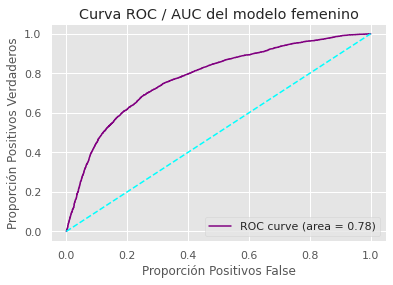

In [101]:
#valores probabilisticos
y_pred_proba = log_reg.predict_proba(X_test)
#Valores para el grafico
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

#Gráfico
plt.figure()
plt.plot(fpr, tpr, color='purple',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='aqua', linestyle='--')
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC del modelo femenino')
plt.legend(loc="lower right")
plt.show()

##CONCLUSIÓN

Finalmente podemos concluir que definitivamente tanto los altos niveles de colesterol, glucosa y un alto nivel de imc, podrían estar propiciando de manera directa el desarrollo de defectos como lo son los altos valores de la presión sistólica y diastolica. Pudimos observar que las personas con edad más avanzada son los que ya han desarrollado la enfermedad. Aún así, queda claro que hay más factores que deben estar asociados al desarrollo de ECV, como las comorbilidades que pueden ser la hipertensión y la diabetes, que no están incluidos en el data set analizado. Pero que haría falta agregar para robustecer nuestro análisis.